In [1]:
#basic package
import tqdm
import os
import numpy as np
import glob
import pandas as pd
import sys
import time
import datetime as dt
import itertools
import re
import math
from collections import Counter
import operator
from scipy import stats
import random
import pickle
from scipy.stats import pearsonr, spearmanr
#repeated measures correlation
import pingouin as pg
from sklearn.utils import shuffle
import random

#kmeans
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing #StandardScaler

#plot
import joypy # for ridgeplot
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\camil\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\camil\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [47]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
from UTILS import kmeans_clustering
import config_origins as config

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Define parameters

In [3]:
path_extracted_data = config.path_extracted_data
id_run = config.id_run
path_extracted_data_adap = os.path.join(path_extracted_data,'Adaptability')
print(id_run)

ALLDATA_


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Download estimates - Individuality plasticity, intercept, variability

In [4]:
#download ind.plasticity over time
df_pred = pd.read_csv(os.path.join(path_extracted_data_adap,'IndividualPredictability.csv'), sep=',')
print(df_pred.shape)
display(df_pred.head(3))
print(list(df_pred.columns))
#sd_HenID__sigma_Intercept: is the estimate for individual differences in residual variance
#b_sigma_Intercept: is the population level estimate of the residual variance
li_col = [x for x in df_pred.columns if 'r_HenID__sigma' in x]
df_pred = df_pred[li_col]#+ ['b_sigma_Intercept']]
#add population level estimate of the residual variance
#for c in li_col:
#    df_pred[c] = df_pred.apply(lambda x: x[c]+x['b_sigma_Intercept'], axis=1)
#doe snot change anything, to keep simple we wont add the pop. level estiamte
display(df_pred.head(3))
#melt data for simplicity
df_pred['run'] = df_pred.index
df_pred = pd.melt(df_pred, id_vars=['run'], value_vars=li_col)
df_pred['HenID'] = df_pred['variable'].map(lambda x: x.split('r_HenID__sigma.')[1].split('.')[0])
#"Importantly, in order to assess whether individuals differ in variance the residual part of the model iscalculated on the log 
#scale! In order to interpret rIIV in biological terms we backtransform rIIV by takingit’s original scale by taking its exponent"
df_pred['Predictability'] = df_pred['value'].map(lambda x: np.exp(x))
print(df_pred.shape)
df_pred.head(3)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2500, 5340)


,X1.b_Intercept,X1.b_sigma_Intercept,X1.b_cDIB_scale,X1.b_IcDIB_scaleE2,X1.b_Treatment_encoded,X1.b_temperature_C_avg_scale,X1.sd_HenID__Intercept,X1.sd_HenID__cDIB_scale,X1.sd_HenID__IcDIB_scaleE2,X1.sd_HenID__sigma_Intercept,...,X10.r_HenID__sigma.hen_9.Intercept.,X10.r_HenID__sigma.hen_90.Intercept.,X10.r_HenID__sigma.hen_91.Intercept.,X10.r_HenID__sigma.hen_92.Intercept.,X10.r_HenID__sigma.hen_94.Intercept.,X10.r_HenID__sigma.hen_95.Intercept.,X10.r_HenID__sigma.hen_97.Intercept.,X10.r_HenID__sigma.hen_98.Intercept.,X10.r_HenID__sigma.hen_99.Intercept.,X10.lp__
0,0.282680,-0.775720,0.133729,-0.266303,-0.231259,-0.035204,0.770372,0.323380,0.196165,0.325706,...,-0.457754,-0.143113,0.121054,0.034033,0.056074,-0.472108,-0.172787,0.046222,-0.321071,-4278.262562
1,0.335173,-0.821186,0.120627,-0.272111,-0.205126,-0.037319,0.798852,0.334838,0.194752,0.370416,...,-0.372533,-0.028809,0.156037,-0.046329,0.221265,-0.331144,-0.284158,0.008143,-0.207100,-4292.755704
2,0.308617,-0.755026,0.107183,-0.245811,-0.195027,-0.031603,0.688947,0.390002,0.233084,0.329125,...,-0.335472,-0.102084,0.138843,0.056368,0.143238,-0.392572,-0.136007,-0.038475,-0.348943,-4297.327739


['X1.b_Intercept', 'X1.b_sigma_Intercept', 'X1.b_cDIB_scale', 'X1.b_IcDIB_scaleE2', 'X1.b_Treatment_encoded', 'X1.b_temperature_C_avg_scale', 'X1.sd_HenID__Intercept', 'X1.sd_HenID__cDIB_scale', 'X1.sd_HenID__IcDIB_scaleE2', 'X1.sd_HenID__sigma_Intercept', 'X1.cor_HenID__Intercept__cDIB_scale', 'X1.cor_HenID__Intercept__IcDIB_scaleE2', 'X1.cor_HenID__cDIB_scale__IcDIB_scaleE2', 'X1.r_HenID.hen_1.Intercept.', 'X1.r_HenID.hen_10.Intercept.', 'X1.r_HenID.hen_101.Intercept.', 'X1.r_HenID.hen_102.Intercept.', 'X1.r_HenID.hen_103.Intercept.', 'X1.r_HenID.hen_104.Intercept.', 'X1.r_HenID.hen_105.Intercept.', 'X1.r_HenID.hen_106.Intercept.', 'X1.r_HenID.hen_107.Intercept.', 'X1.r_HenID.hen_108.Intercept.', 'X1.r_HenID.hen_109.Intercept.', 'X1.r_HenID.hen_110.Intercept.', 'X1.r_HenID.hen_111.Intercept.', 'X1.r_HenID.hen_112.Intercept.', 'X1.r_HenID.hen_113.Intercept.', 'X1.r_HenID.hen_114.Intercept.', 'X1.r_HenID.hen_116.Intercept.', 'X1.r_HenID.hen_117.Intercept.', 'X1.r_HenID.hen_118.Intercep

,X1.r_HenID__sigma.hen_1.Intercept.,X1.r_HenID__sigma.hen_10.Intercept.,X1.r_HenID__sigma.hen_101.Intercept.,X1.r_HenID__sigma.hen_102.Intercept.,X1.r_HenID__sigma.hen_103.Intercept.,X1.r_HenID__sigma.hen_104.Intercept.,X1.r_HenID__sigma.hen_105.Intercept.,X1.r_HenID__sigma.hen_106.Intercept.,X1.r_HenID__sigma.hen_107.Intercept.,X1.r_HenID__sigma.hen_108.Intercept.,...,X10.r_HenID__sigma.hen_89.Intercept.,X10.r_HenID__sigma.hen_9.Intercept.,X10.r_HenID__sigma.hen_90.Intercept.,X10.r_HenID__sigma.hen_91.Intercept.,X10.r_HenID__sigma.hen_92.Intercept.,X10.r_HenID__sigma.hen_94.Intercept.,X10.r_HenID__sigma.hen_95.Intercept.,X10.r_HenID__sigma.hen_97.Intercept.,X10.r_HenID__sigma.hen_98.Intercept.,X10.r_HenID__sigma.hen_99.Intercept.
0,-0.005904,0.047861,0.173210,-0.614399,0.159587,0.432441,0.562305,0.279357,0.443795,0.088944,...,-0.433353,-0.457754,-0.143113,0.121054,0.034033,0.056074,-0.472108,-0.172787,0.046222,-0.321071
1,-0.170412,-0.098106,0.437964,-0.634846,0.126732,0.317560,0.434647,0.396280,0.583353,0.202645,...,-0.371251,-0.372533,-0.028809,0.156037,-0.046329,0.221265,-0.331144,-0.284158,0.008143,-0.207100
2,-0.169915,0.364136,0.305162,-0.555484,0.324370,0.701538,0.208931,0.203863,0.403434,-0.078094,...,-0.621434,-0.335472,-0.102084,0.138843,0.056368,0.143238,-0.392572,-0.136007,-0.038475,-0.348943


(3250000, 5)


,run,variable,value,HenID,Predictability
0,0,X1.r_HenID__sigma.hen_1.Intercept.,-0.005904,hen_1,0.994114
1,1,X1.r_HenID__sigma.hen_1.Intercept.,-0.170412,hen_1,0.843317
2,2,X1.r_HenID__sigma.hen_1.Intercept.,-0.169915,hen_1,0.843737


#download ind.plasticity over time
df_pred = pd.read_csv(os.path.join(path_extracted_data_adap,'IndividualPredictability.csv'), sep=',')
print(df_pred.shape)
display(df_pred.head(3))
print(list(df_pred.columns))
li_col = [x for x in df_pred.columns if 'r_HenID__sigma' in x]
df_pred = df_pred[li_col]
df_pred['run'] = df_pred.index
df_pred = pd.melt(df_pred, id_vars=['run'], value_vars=li_col)
df_pred['HenID'] = df_pred['variable'].map(lambda x: x.split('[')[1].split(',')[0])
#"Importantly, in order to assess whether individuals differ in variance the residual part of the model iscalculated on the log 
#scale! In order to interpret rIIV in biological terms we backtransform rIIV by takingit’s original scale by taking its exponent"
df_pred['Predictability'] = df_pred['value'].map(lambda x: np.exp(x))
print(df_pred.shape)
df_pred.head(3)

In [5]:
#download ind plasticity and intercepts
df_BT = pd.read_csv(os.path.join(path_extracted_data_adap,'IndividualBehaviouralType.csv'), sep=',')
df_BT.rename(columns={'mean':'BehaviouralType'},inplace=True)
print(df_BT.shape)
df_BT.head(3)

(130, 6)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,groupFctr,groupID,term,BehaviouralType,median,sd
0,HenID,hen_1,(Intercept),-0.852194,-0.847932,0.124761
1,HenID,hen_10,(Intercept),-0.366230,-0.371412,0.132275
2,HenID,hen_101,(Intercept),0.669667,0.673175,0.134817


In [6]:
#download ind plasticity and intercepts
df_ind = pd.read_csv(os.path.join(path_extracted_data_adap,'IndividualPlasticity.csv'), sep=',')
display(df_ind['term'].unique())
dico_ = {'(Intercept)':'BLUP_int', 
         'cDIB_scale':'BLUP_slopes1', 
         'I(cDIB_scale^2)':'BLUP_slopes2'}
df_ind['term'] = df_ind['term'].map(lambda x: dico_[x])
print(df_ind.shape)
print(df_ind['groupFctr'].unique(), df_ind['term'].unique())
df_ind.head(3)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['(Intercept)', 'cDIB_scale', 'I(cDIB_scale^2)'], dtype=object)

(390, 6)
['HenID'] ['BLUP_int' 'BLUP_slopes1' 'BLUP_slopes2']


,groupFctr,groupID,term,mean,median,sd
0,HenID,hen_1,BLUP_int,-1.189385,-1.189729,0.164508
1,HenID,hen_10,BLUP_int,-0.586497,-0.587552,0.152073
2,HenID,hen_101,BLUP_int,0.653292,0.653099,0.171215


# Select individuals to highlight in visuals

In [7]:
#select 5 hens to highlight within the plot: two most extremes intercept (min, max), two most extreme plasticity (min, max) 
#and one?

#Behavioural type
li = df_BT.sort_values('BehaviouralType', ascending=True)['groupID'].tolist()
li_int = [li[-1], li[0]]
print(li_int)

#Plasticity
li = df_ind[df_ind['term']=='BLUP_slopes2'].sort_values('mean', ascending=True)['groupID'].tolist()
li_plasticity = [li[-1], li[0]]
print(li_plasticity)

#predictability
df_pred_summarized = df_pred.groupby('HenID')['Predictability'].agg(lambda x: list(x)).reset_index()
df_pred_summarized['Predictability_mean'] = df_pred_summarized['Predictability'].map(lambda x: np.mean(x))
df_pred_summarized['Predictability_sd'] = df_pred_summarized['Predictability'].map(lambda x: np.std(x))
display(df_pred_summarized.head(3))
li = df_pred_summarized.sort_values('Predictability_mean')['HenID'].tolist()
li_pred = [li[-1], li[0]]
print(li_pred)
li_hen_visual = list(set(li_int+li_plasticity+li_pred))

#add random ones s that total sum to 5
#random.seed(0)
#li_r = random.sample([x for x in df_ind['groupID'].unique() if x not in li_hen_visual], 5-len(li_hen_visual))
#li_hen_visual = li_hen_visual + li_r
print('selected hens: %s' %' '.join(li_hen_visual))
#df_ind['HenID '] = df_ind['HenID'].map(lambda x: 'Others' if x not in li_hen_visual else x)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['hen_9', 'hen_146']
['hen_69', 'hen_154']


,HenID,Predictability,Predictability_mean,Predictability_sd
0,hen_1,"[0.9941138560785111, 0.8433169548986118, 0.843...",0.900299,0.100825
1,hen_10,"[1.049024422762113, 0.9065532151518607, 1.4392...",1.074071,0.118514
2,hen_101,"[1.1891160321446288, 1.5495497810506302, 1.356...",1.311825,0.155223


['hen_62', 'hen_39']
selected hens: hen_62 hen_9 hen_69 hen_39 hen_146 hen_154


#as we have 6 animals
pal_ = {henID:'black' for henID in li_all_hen}
pal_ = {'Other Hens':'black'}
pal_[li_int[0]] = 'royalblue' #cornflowerblue
pal_[li_int[1]] = 'blue'
pal_[li_plasticity[0]] = 'lime'
pal_[li_plasticity[1]] = 'green'
pal_[li_pred[0]] = 'orange'
pal_[li_pred[1]] = 'orangered'
#'fuchsia','purple'

In [8]:
#higher score means higher dispertion so we want brither for higher score
df_henorder = df_pred_summarized[df_pred_summarized['HenID'].isin(li_hen_visual)].sort_values(['Predictability_mean'], 
                                                                                              ascending=True)
display(df_henorder)
li_hen_order = df_henorder['HenID'].tolist()

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,Predictability,Predictability_mean,Predictability_sd
68,hen_39,"[0.26296972895526627, 0.24910965673115523, 0.2...",0.260152,0.037344
121,hen_9,"[0.6766565873412991, 0.9118153660318171, 0.673...",0.717726,0.083629
41,hen_146,"[0.9093586879667866, 1.071831737989991, 1.0769...",0.957425,0.105481
99,hen_69,"[1.3671008809398464, 1.7390391892755876, 1.426...",1.315056,0.146953
47,hen_154,"[1.6746224444169857, 1.509058039656321, 1.5485...",1.475151,0.162600
92,hen_62,"[1.8817493214037961, 2.1968100234506824, 1.826...",1.848369,0.189302


In [9]:
#choose color: https://matplotlib.org/stable/gallery/color/named_colors.html
#define the color based on the predictability for visual purposes: more predictable darker, less predictbale brighter
#'crimson','olive','orangered',
li_nicecolor_brighter = ['blue','fuchsia','orange','lime','cyan','yellow']
#exchange two colors for visual purpose, no rule to implement
li_nicecolor_brighter = ['blue','cyan','orange','lime','fuchsia','yellow']
li_all_hen =  df_ind['groupID'].unique()
pal_ = {henID:'black' for henID in li_all_hen}
pal_ = {'Other Hens':'black'}
for i,henID in enumerate(li_hen_order):
    pal_[henID] = li_nicecolor_brighter[i]

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Visualise Estimates

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


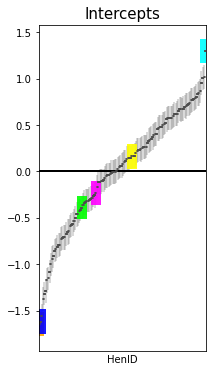

In [10]:
#behavioural type
df_plt = df_BT.sort_values(['BehaviouralType'])
df_plt[' '] = df_plt['groupID'].map(lambda x: x if x in li_hen_visual else 'Other Hens')
df_plt['color'] = df_plt[' '].map(lambda x: pal_[x])
#hue_order = li_hen_visual + ['Other Hens']
plt.figure(figsize=(3,6))
ax = sns.boxplot(x='groupID', y='BehaviouralType', data=df_plt, color='grey');
ax.errorbar(df_plt['groupID'], df_plt['BehaviouralType'], yerr=df_plt['sd'], fmt=' ', zorder=-1, alpha=0.2, 
            color=df_plt['color'].tolist());
#bigger error bars
df_plt_ = df_plt[df_plt['groupID'].isin(li_hen_visual)]
ax.errorbar(df_plt_['groupID'], df_plt_['BehaviouralType'], yerr=df_plt_['sd'], fmt=' ', zorder=-1, alpha=0.9, elinewidth=10,
            color=df_plt_['color'].tolist());
plt.xticks([]) #remove xlabel annotations
plt.xlabel('HenID')
plt.ylabel('')
plt.title('Intercepts', size=15);
plt.axhline(y=0, linewidth=2, color = 'k')
plt.savefig(os.path.join(path_extracted_data_adap,'estimatesintercepts.png'), bbox_inches='tight')
plt.show();

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


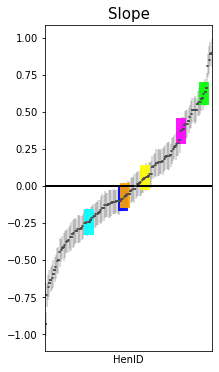

In [11]:
#plasticity
df_plt = df_ind[df_ind['term']=='BLUP_slopes1'].sort_values(['mean'])
df_plt[' '] = df_plt['groupID'].map(lambda x: x if x in li_hen_visual else 'Other Hens')
df_plt['color'] = df_plt[' '].map(lambda x: pal_[x])
plt.figure(figsize=(3,6))
ax = sns.boxplot(x='groupID', y='mean', data=df_plt, color='grey');
ax.errorbar(df_plt['groupID'], df_plt['mean'], yerr=df_plt['sd'],fmt=' ', zorder=-1, alpha=0.2, 
            color=df_plt['color'].tolist());
#bigger error bars
df_plt_ = df_plt[df_plt['groupID'].isin(li_hen_visual)]
ax.errorbar(df_plt_['groupID'], df_plt_['mean'], yerr=df_plt_['sd'], fmt=' ', zorder=-1, alpha=0.9, elinewidth=10,
            color=df_plt_['color'].tolist());
plt.xticks([]) #remove xlabel annotations
plt.xlabel('HenID')
plt.ylabel('')
plt.title('Slope', size=15);
plt.axhline(y=0, linewidth=2, color = 'k')
plt.savefig(os.path.join(path_extracted_data_adap,'estimatesplasticitySlope.png'), bbox_inches='tight')
plt.show();

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


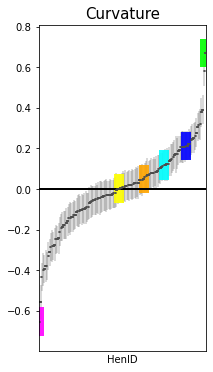

In [12]:
#plasticity
df_plt = df_ind[df_ind['term']=='BLUP_slopes2'].sort_values(['mean'])
df_plt[' '] = df_plt['groupID'].map(lambda x: x if x in li_hen_visual else 'Other Hens')
df_plt['color'] = df_plt[' '].map(lambda x: pal_[x])
plt.figure(figsize=(3,6))
ax = sns.boxplot(x='groupID', y='mean', data=df_plt, color='grey');
ax.errorbar(df_plt['groupID'], df_plt['mean'], yerr=df_plt['sd'],fmt=' ', zorder=-1, alpha=0.2, 
            color=df_plt['color'].tolist());
#bigger error bars
df_plt_ = df_plt[df_plt['groupID'].isin(li_hen_visual)]
ax.errorbar(df_plt_['groupID'], df_plt_['mean'], yerr=df_plt_['sd'], fmt=' ', zorder=-1, alpha=0.9, elinewidth=10,
            color=df_plt_['color'].tolist());
plt.xticks([]) #remove xlabel annotations
plt.xlabel('HenID')
plt.ylabel('')
plt.title('Curvature', size=15);
plt.axhline(y=0, linewidth=2, color = 'k')
plt.savefig(os.path.join(path_extracted_data_adap,'estimatesplasticitycurvature.png'), bbox_inches='tight')
plt.show();

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


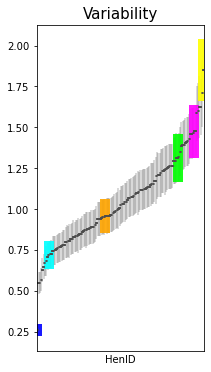

,HenID,Predictability,Predictability_mean,Predictability_sd
68,hen_39,"[0.26296972895526627, 0.24910965673115523, 0.2...",0.260152,0.037344
121,hen_9,"[0.6766565873412991, 0.9118153660318171, 0.673...",0.717726,0.083629
41,hen_146,"[0.9093586879667866, 1.071831737989991, 1.0769...",0.957425,0.105481
99,hen_69,"[1.3671008809398464, 1.7390391892755876, 1.426...",1.315056,0.146953
47,hen_154,"[1.6746224444169857, 1.509058039656321, 1.5485...",1.475151,0.162600
92,hen_62,"[1.8817493214037961, 2.1968100234506824, 1.826...",1.848369,0.189302


In [13]:
#predictability
df_plt = df_pred_summarized.sort_values(['Predictability_mean']).copy()
df_plt[' '] = df_plt['HenID'].map(lambda x: x if x in li_hen_visual else 'Other Hens')
df_plt['color'] = df_plt[' '].map(lambda x: pal_[x])
#hue_order = li_hen_visual + ['Other Hens']
plt.figure(figsize=(3,6))
ax = sns.boxplot(x='HenID', y='Predictability_mean', data=df_plt, color='grey');
ax.errorbar(df_plt['HenID'], df_plt['Predictability_mean'], yerr=df_plt['Predictability_sd'],fmt=' ', zorder=-1, alpha=0.2, 
            color=df_plt['color'].tolist());
#bigger error bars
df_plt_ = df_plt[df_plt['HenID'].isin(li_hen_visual)]
ax.errorbar(df_plt_['HenID'], df_plt_['Predictability_mean'], yerr=df_plt_['Predictability_sd'], fmt=' ', zorder=-1, alpha=0.9, elinewidth=10,
            color=df_plt_['color'].tolist());
plt.xticks([]) #remove xlabel annotations
plt.xlabel('HenID')
plt.ylabel('')
plt.title('Variability', size=15);
plt.savefig(os.path.join(path_extracted_data_adap,'estimatespredictability.png'), bbox_inches='tight')
plt.show();
df_predorder = df_pred_summarized[df_pred_summarized['HenID'].isin(li_hen_visual)].sort_values(['Predictability_mean'], ascending=True).copy()
display(df_predorder)
#li_orderedhenselected_pred = df_predorder['HenID'].tolist()
#hens with higher rIIV are less predictable than individualswith lower rIIV (Fig )
#The most predictable individual (hen 39) has an average residual variance of 0.01 around its behavioral mean, whereas the 
#least predictable individual (hen 109) has an average residual variance of 0.27km

# Visualise raw data

In [14]:
pal_all = {k.split(':')[0]:v for k,v in pal_.items()}
hue_order_all=[h.split(':')[0] for h in li_hen_visual]+['Other Hens']

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Other Hens    5004
hen_69          43
hen_62          43
hen_146         43
hen_154         42
hen_9           42
hen_39          42
Name: HenID , dtype: int64

(5259, 35)


,WIB,HenID,RPen,DIB,CLASS,TrackingSystemID,PenID,temperature_C_avg,Treatment,tobeusedPCA,...,vertical_travel_distance_perh,cDIB,cDIBfact,InitialWeight_kg,PC1,temperature_C_avg_scale,cDIB_scale,pred_pop,pred_HenID,HenID
0,2,hen_131,4,11,Other,TrackingSystem 10-12,pen10,11.500000,TRAN,1,...,2.5,11,11,1.202,0.083445,0.207243,-1.835419,-0.088320,0.240762,Other Hens
1,2,hen_131,4,12,Other,TrackingSystem 10-12,pen10,10.166667,TRAN,0,...,2.1,12,12,1.202,-0.019014,-0.212289,-1.754145,-0.105490,0.223592,Other Hens
2,2,hen_131,4,13,Other,TrackingSystem 10-12,pen10,9.000000,TRAN,0,...,2.4,13,13,1.202,-0.331134,-0.579379,-1.672870,-0.118791,0.210290,Other Hens


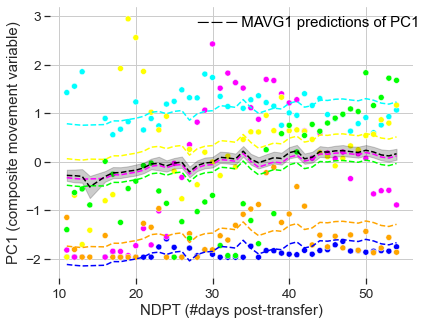

In [15]:
# download ind.plasticity over time
df_PL = pd.read_csv(os.path.join(path_extracted_data_adap,'EstimatedPlasticity_int.csv'), sep=',')
#adapt hen and colors
df_PL['HenID '] = df_PL['HenID'].map(lambda x: 'Other Hens' if x not in [h.split(':')[0] for h in li_hen_visual] else x)
display(df_PL['HenID '].value_counts())
print(df_PL.shape)
display(df_PL.head(3))
#plot plasticity over time
sns.set(rc={'figure.figsize':(6.5,5)})
sns.set_theme(style="ticks", font_scale=1.25)
sns.scatterplot(x='DIB', y='PC1', data=df_PL[df_PL['HenID ']!='Other Hens'], hue='HenID ', palette=pal_all, 
                hue_order=hue_order_all, legend=False, alpha=1);
sns.lineplot(x='DIB', y='pred_HenID', data=df_PL, hue='HenID ', linestyle="dashed", palette=pal_all, hue_order=hue_order_all,
            legend=False, alpha=1);
#remove all borders
sns.despine(bottom = True, left = True)
#plt.title('Individual plasticity');
plt.grid()
plt.ylabel('PC1 (composite movement variable)')
plt.xlabel('NDPT (#days post-transfer)')
plt.text(28, 2.8, '─ ─ ─ MAVG1 predictions of PC1', color='black')
plt.savefig(os.path.join(path_extracted_data_adap,'RawAdnEstimatedMAVG1.png'), bbox_inches='tight')

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Other Hens    5004
hen_69          43
hen_62          43
hen_146         43
hen_154         42
hen_9           42
hen_39          42
Name: HenID , dtype: int64

(5259, 35)


,WIB,HenID,RPen,DIB,CLASS,TrackingSystemID,PenID,temperature_C_avg,Treatment,tobeusedPCA,...,vertical_travel_distance_perh,cDIB,cDIBfact,InitialWeight_kg,PC1,temperature_C_avg_scale,cDIB_scale,pred_pop,pred_HenID,HenID
0,2,hen_131,4,11,Other,TrackingSystem 10-12,pen10,11.500000,TRAN,1,...,2.5,11,11,1.202,0.083445,0.207243,-1.835419,-0.591406,-0.258148,Other Hens
1,2,hen_131,4,12,Other,TrackingSystem 10-12,pen10,10.166667,TRAN,0,...,2.1,12,12,1.202,-0.019014,-0.212289,-1.754145,-0.501151,-0.167893,Other Hens
2,2,hen_131,4,13,Other,TrackingSystem 10-12,pen10,9.000000,TRAN,0,...,2.4,13,13,1.202,-0.331134,-0.579379,-1.672870,-0.415425,-0.082167,Other Hens


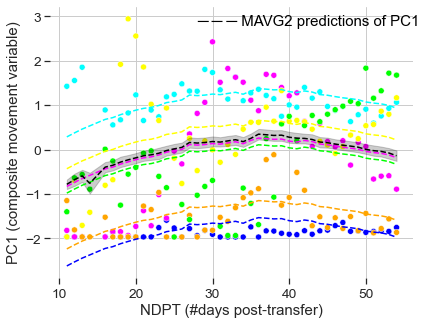

In [16]:
# download ind.plasticity over time
df_PL = pd.read_csv(os.path.join(path_extracted_data_adap,'EstimatedPlasticity_intquad.csv'), sep=',')
#adapt hen and colors
df_PL['HenID '] = df_PL['HenID'].map(lambda x: 'Other Hens' if x not in [h.split(':')[0] for h in li_hen_visual] else x)
display(df_PL['HenID '].value_counts())
print(df_PL.shape)
display(df_PL.head(3))
#plot plasticity over time
sns.set(rc={'figure.figsize':(6.5,5)})
sns.set_theme(style="ticks", font_scale=1.25)
sns.scatterplot(x='DIB', y='PC1', data=df_PL[df_PL['HenID ']!='Other Hens'], hue='HenID ', palette=pal_all, 
                hue_order=hue_order_all, legend=False, alpha=1);
sns.lineplot(x='DIB', y='pred_HenID', data=df_PL, hue='HenID ', linestyle="dashed", palette=pal_all, hue_order=hue_order_all,
            legend=False, alpha=1);
#remove all borders
sns.despine(bottom = True, left = True)
#plt.title('Individual plasticity');
plt.grid()
plt.ylabel('PC1 (composite movement variable)')
plt.xlabel('NDPT (#days post-transfer)')
plt.text(28, 2.8, '─ ─ ─ MAVG2 predictions of PC1', color='black')
plt.savefig(os.path.join(path_extracted_data_adap,'RawAdnEstimatedMAVG2.png'), bbox_inches='tight')

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Other Hens    5004
hen_69          43
hen_62          43
hen_146         43
hen_154         42
hen_9           42
hen_39          42
Name: HenID , dtype: int64

(5259, 35)


,WIB,HenID,RPen,DIB,CLASS,TrackingSystemID,PenID,temperature_C_avg,Treatment,tobeusedPCA,...,vertical_travel_distance_perh,cDIB,cDIBfact,InitialWeight_kg,PC1,temperature_C_avg_scale,cDIB_scale,pred_pop,pred_HenID,HenID
0,2,hen_131,4,11,Other,TrackingSystem 10-12,pen10,11.500000,TRAN,1,...,2.5,11,11,1.202,0.083445,0.207243,-1.835419,-0.613201,-0.052561,Other Hens
1,2,hen_131,4,12,Other,TrackingSystem 10-12,pen10,10.166667,TRAN,0,...,2.1,12,12,1.202,-0.019014,-0.212289,-1.754145,-0.521361,0.029670,Other Hens
2,2,hen_131,4,13,Other,TrackingSystem 10-12,pen10,9.000000,TRAN,0,...,2.4,13,13,1.202,-0.331134,-0.579379,-1.672870,-0.434131,0.107289,Other Hens


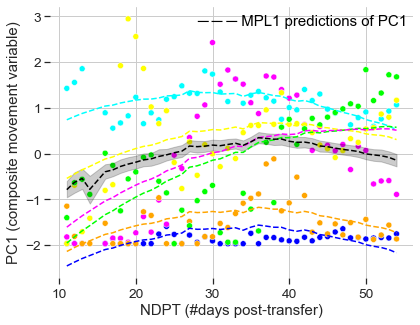

In [17]:
# download ind.plasticity over time
df_PL = pd.read_csv(os.path.join(path_extracted_data_adap,'EstimatedPlasticity_curve.csv'), sep=',')
#adapt hen and colors
df_PL['HenID '] = df_PL['HenID'].map(lambda x: 'Other Hens' if x not in [h.split(':')[0] for h in li_hen_visual] else x)
display(df_PL['HenID '].value_counts())
print(df_PL.shape)
display(df_PL.head(3))
#plot plasticity over time
sns.set(rc={'figure.figsize':(6.5,5)})
sns.set_theme(style="ticks", font_scale=1.25)
sns.scatterplot(x='DIB', y='PC1', data=df_PL[df_PL['HenID ']!='Other Hens'], hue='HenID ', palette=pal_all, 
                hue_order=hue_order_all, legend=False, alpha=1);
sns.lineplot(x='DIB', y='pred_HenID', data=df_PL, hue='HenID ', linestyle="dashed", palette=pal_all, hue_order=hue_order_all,
            legend=False, alpha=1);
#remove all borders
sns.despine(bottom = True, left = True)
#plt.title('Individual plasticity');
plt.grid()
plt.ylabel('PC1 (composite movement variable)')
plt.xlabel('NDPT (#days post-transfer)')
plt.text(28, 2.8, '─ ─ ─ MPL1 predictions of PC1', color='black')
plt.savefig(os.path.join(path_extracted_data_adap,'RawAdnEstimatedMPL1.png'), bbox_inches='tight')

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Other Hens    5004
hen_69          43
hen_62          43
hen_146         43
hen_154         42
hen_9           42
hen_39          42
Name: HenID , dtype: int64

(5259, 35)


,WIB,HenID,RPen,DIB,CLASS,TrackingSystemID,PenID,temperature_C_avg,Treatment,tobeusedPCA,...,vertical_travel_distance_perh,cDIB,cDIBfact,InitialWeight_kg,PC1,temperature_C_avg_scale,cDIB_scale,pred_pop,pred_HenID,HenID
0,2,hen_131,4,11,Other,TrackingSystem 10-12,pen10,11.500000,TRAN,1,...,2.5,11,11,1.202,0.083445,0.207243,-1.835419,-0.641352,-0.251928,Other Hens
1,2,hen_131,4,12,Other,TrackingSystem 10-12,pen10,10.166667,TRAN,0,...,2.1,12,12,1.202,-0.019014,-0.212289,-1.754145,-0.547928,-0.143184,Other Hens
2,2,hen_131,4,13,Other,TrackingSystem 10-12,pen10,9.000000,TRAN,0,...,2.4,13,13,1.202,-0.331134,-0.579379,-1.672870,-0.459219,-0.040322,Other Hens


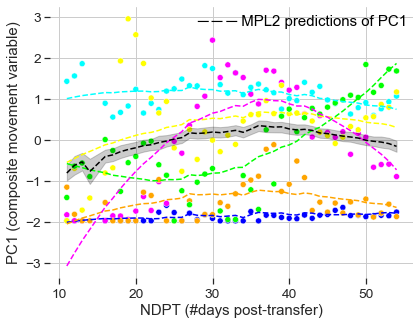

In [18]:
# download ind.plasticity over time
df_PL = pd.read_csv(os.path.join(path_extracted_data_adap,'EstimatedPlasticity.csv'), sep=',')
#adapt hen and colors
df_PL['HenID '] = df_PL['HenID'].map(lambda x: 'Other Hens' if x not in [h.split(':')[0] for h in li_hen_visual] else x)
display(df_PL['HenID '].value_counts())
print(df_PL.shape)
display(df_PL.head(3))
#plot plasticity over time
sns.set(rc={'figure.figsize':(6.5,5)})
sns.set_theme(style="ticks", font_scale=1.25)
sns.scatterplot(x='DIB', y='PC1', data=df_PL[df_PL['HenID ']!='Other Hens'], hue='HenID ', palette=pal_all, 
                hue_order=hue_order_all, legend=False, alpha=1);
sns.lineplot(x='DIB', y='pred_HenID', data=df_PL, hue='HenID ', linestyle="dashed", palette=pal_all, hue_order=hue_order_all,
            legend=False, alpha=1);
#remove all borders
sns.despine(bottom = True, left = True)
#plt.title('Individual plasticity');
plt.grid()
plt.ylabel('PC1 (composite movement variable)')
plt.xlabel('NDPT (#days post-transfer)')
plt.text(28, 2.8, '─ ─ ─ MPL2 predictions of PC1', color='black')
plt.savefig(os.path.join(path_extracted_data_adap,'RawAdnEstimatedMPL2.png'), bbox_inches='tight')

#plot plasticity over time
#TODO: add pred_HenID1.4
sns.lineplot(x='DIB', y='pred_HenID1.4', data=df_PL, hue='HenID ', linestyle="dashed", palette=pal_all, hue_order=hue_order_all);
plt.title('Individual plasticity');
plt.savefig(os.path.join(path_extracted_data_adap,'EstimatedPlastictyOvertime.png'), bbox_inches='tight')

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


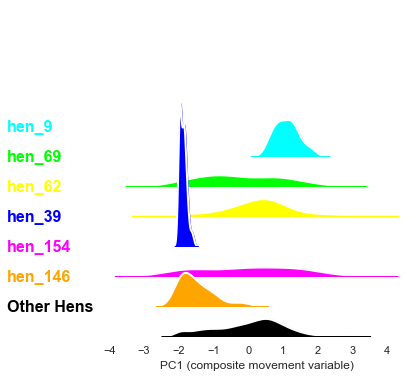

In [19]:
#all in once
#change order of hen just for visual purpose
df_PL = df_PL.sort_values(['HenID '], ascending=False)
#behavioural type
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(df_PL, row="HenID ", hue="HenID ", aspect=8, height=0.8, palette=pal_all)
#densities
g.map(sns.kdeplot, "PC1", fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "PC1", color="w", lw=2)
#Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.3, .2, label, fontweight="bold", fontsize=16, color=color, ha="left", va="center", transform=ax.transAxes)
g.map(label, "PC1")
#Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.8)

#remove axes info that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True);
plt.xlabel('PC1 (composite movement variable)')
plt.savefig(os.path.join(path_extracted_data_adap,'Rawdensity.png'), bbox_inches='tight') #, pad_inches=-0.1)
plt.show()

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,pred_HenID,PC1,diff,max_error
0,hen_1,"[0.292250415984591, 0.22892194088401602, 0.140...","[0.23178205900797502, 0.0804739638450276, 0.62...","[0.06046835697661598, 0.14844797703898843, 0.4...",1.008741
1,hen_10,"[0.223821664631925, 0.20803125717900797, 0.165...","[-0.0964765748504578, 0.345492975132909, 0.438...","[0.3202982394823828, 0.13746171795390102, 0.27...",1.077666
2,hen_101,"[-0.16844795107924695, -0.08204144564977, -0.0...","[0.587997660413702, 0.5687399786136379, 0.3897...","[0.756445611492949, 0.6507814242634079, 0.4141...",1.480576


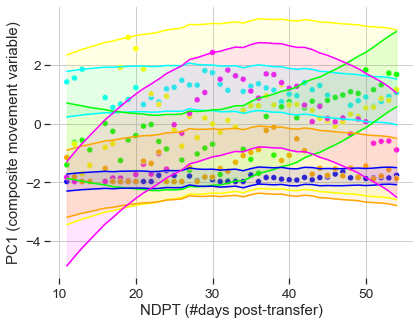

In [20]:
#predictability
sns.set(rc={'figure.figsize':(6.5,5)})
sns.set_theme(style="ticks", font_scale=1.25)
sns.scatterplot(x='DIB', y='PC1', data=df_PL[df_PL['HenID ']!='Other Hens'], hue='HenID ', palette=pal_all, 
                hue_order=hue_order_all, legend=False);
#sns.lineplot(x='DIB', y='pred_HenID', data=df_PL[df_PL['HenID ']!='Other Hens'], hue='HenID ', linestyle="dashed", palette=pal_all, hue_order=hue_order_all,
#            legend=False);
#add max error
df_PL = df_PL.sort_values(['DIB'], ascending=False)
df_ = df_PL.groupby('HenID')[['pred_HenID','PC1']].agg(lambda x: list(x)).reset_index()
df_['diff'] = df_.apply(lambda x: [abs(x['pred_HenID'][i]-x['PC1'][i]) for i in range(0,len(x['pred_HenID']))], axis=1)
df_['max_error'] = df_['diff'].map(lambda x: max(x))
display(df_.head(3))
df_PL['max_error'] = df_PL['HenID'].map(lambda x: df_[df_['HenID']==x]['max_error'].values[0])
for henID in li_hen_visual:
    y = df_PL[df_PL['HenID ']==henID]['pred_HenID']
    err = df_PL[df_PL['HenID ']==henID]['max_error']
    x = df_PL[df_PL['HenID ']==henID]['DIB']
    plt.plot(x, y-err, color=pal_[henID])
    plt.plot(x, y+err, color=pal_[henID])
    plt.fill_between(x, y-err, y+err, alpha=0.1, color=pal_[henID])
#plt.text(11, 1.4, '─ ─ ─ estimated slopes', color='black')
#remove all borders
sns.despine(bottom = True, left = True)
plt.grid()
plt.ylabel('PC1 (composite movement variable)')
plt.xlabel('NDPT (#days post-transfer)')
plt.savefig(os.path.join(path_extracted_data_adap,'RawVariability.png'), bbox_inches='tight')

# Merge all individual information

In [21]:
df_indall = pd.merge(df_ind.pivot(columns='term', index='groupID',values='mean').reset_index(), 
                     df_pred_summarized, left_on='groupID', right_on='HenID', how='outer')
df_indall.rename(columns={'mean':'predictability'}, inplace=True)
print(df_indall.shape)
df_indall = pd.merge(df_indall, df_BT[['groupID','BehaviouralType']], on='groupID', how='outer')
print(df_indall.shape)
df_indall.head(3)

(130, 8)
(130, 9)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,groupID,BLUP_int,BLUP_slopes1,BLUP_slopes2,HenID,Predictability,Predictability_mean,Predictability_sd,BehaviouralType
0,hen_1,-1.189385,0.587122,0.306218,hen_1,"[0.9941138560785111, 0.8433169548986118, 0.843...",0.900299,0.100825,-0.852194
1,hen_10,-0.586497,0.379040,0.189643,hen_10,"[1.049024422762113, 0.9065532151518607, 1.4392...",1.074071,0.118514,-0.366230
2,hen_101,0.653292,-0.318522,0.014147,hen_101,"[1.1891160321446288, 1.5495497810506302, 1.356...",1.311825,0.155223,0.669667


In [22]:
#UNTILL PREDICTABILITY not run on the new elected hens (i.e. with 3 less animals)
df_indall = df_indall[~df_indall['groupID'].isnull()]

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
print(pearsonr(df_indall['BLUP_int'].tolist(), df_indall['BehaviouralType'].tolist()))
print(pearsonr(df_indall['BehaviouralType'].tolist(), df_indall['BLUP_slopes1'].tolist()))
print(pearsonr(df_indall['BehaviouralType'].tolist(), df_indall['BLUP_slopes2'].tolist()))
print(pearsonr(df_indall['BehaviouralType'].tolist(), df_indall['Predictability_mean'].tolist()))
print('')
print(pearsonr(df_indall['BLUP_slopes1'].tolist(), df_indall['BLUP_slopes2'].tolist()))
print(pearsonr(df_indall['BLUP_slopes1'].tolist(), df_indall['Predictability_mean'].tolist()))
print(pearsonr(df_indall['BLUP_slopes2'].tolist(), df_indall['Predictability_mean'].tolist()))

(0.9541604660463632, 6.432266094693348e-69)
(-0.16693892855503492, 0.05764905198863031)
(-0.1377315861875078, 0.11812980788752414)
(0.1949222792016955, 0.02625945701383817)

(-0.09504999756045004, 0.28205815780660565)
(0.10395252306665363, 0.2392012583867698)
(-0.26221242798770866, 0.0025806389306281307)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


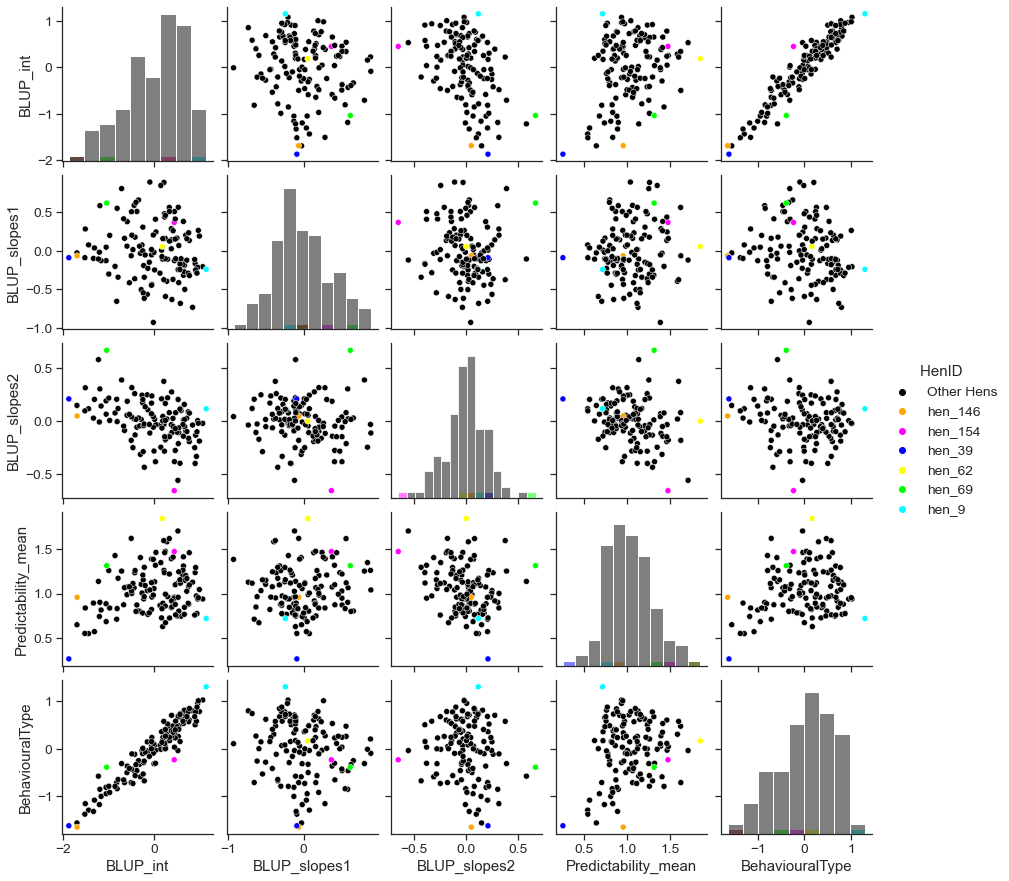

In [24]:
df_indall['HenID '] = df_indall['HenID'].map(lambda x: 'Other Hens' if x not in li_hen_visual else x)
sns.pairplot(df_indall[['HenID ','BLUP_int','BLUP_slopes1','BLUP_slopes2','Predictability_mean','BehaviouralType']], hue='HenID ', palette=pal_all, diag_kind="hist");
plt.savefig(os.path.join(path_extracted_data_adap,'BLUPestiamtes.png'), bbox_inches='tight')
plt.show()

#correaltion
sns.set(rc={'figure.figsize':(6.5,5)})
df_corr = df_ind.pivot(columns='term',index='groupID', values='mean').reset_index()
df_corr['HenID '] = df_corr['groupID'].map(lambda x: 'Other Hens' if x not in li_hen_visual else x)
sns.scatterplot(x='BLUP_int', y='BLUP_slopes', data=df_corr, hue='HenID ', palette=pal_all, hue_order=hue_order_all,
               legend=False);
plt.text(-1.3, -0.037, 'corr=-0.85', size=15)
plt.savefig(os.path.join(path_extracted_data_adap,'RSlopesVSestiamtes.png'), bbox_inches='tight')

# Dataframe for stats ~ health

In [25]:
li_selected_hens = pickle.load(open(os.path.join(path_extracted_data_adap, 'li_selected_hens.pkl'), 'rb'))
print(len(li_selected_hens))

130


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
df_MVT = pd.read_csv(os.path.join(path_extracted_data_adap,'df_MVT_4individuality.csv'), sep=';')
print(df_MVT.shape)
df_MVT[df_MVT['HenID']=='hen_39']
df_MVT.head(3)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5259, 26)


,WIB,HenID,RPen,DIB,CLASS,TrackingSystemID,PenID,temperature_C_avg,Treatment,tobeusedPCA,...,perc_duration_2_Zone,perc_1_Zone_while_WG_open,nbr_stays_2_Zone_perh,nbr_stays_4_Zone_perh,nbr_stays_3_Zone_perh,nbr_stays_5_Zone_perh,nbr_stays_1_Zone_perh,in_WG_15mnAfterOpening,SleepingHeight,vertical_travel_distance_perh
0,2,hen_131,4.0,11,Other,TrackingSystem 10-12,pen10,11.500000,TRAN,1,...,57.0,0.0,0.9,0.4,1.0,0.3,0.0,0,3,2.5
1,2,hen_131,4.0,12,Other,TrackingSystem 10-12,pen10,10.166667,TRAN,0,...,61.0,0.0,0.9,0.2,1.0,0.1,0.0,0,3,2.1
2,2,hen_131,4.0,13,Other,TrackingSystem 10-12,pen10,9.000000,TRAN,0,...,37.0,0.0,0.6,0.5,0.8,0.4,0.0,0,1,2.4


In [27]:
#to add info on the first week
df_MVT_ALL = pd.read_csv(os.path.join(path_extracted_data, id_run+'_daily_ALL_variables_verified.csv'), sep=';', 
                     parse_dates=['level'], dayfirst=True) 
print(df_MVT_ALL.shape)
df_MVT_ALL = df_MVT_ALL[df_MVT_ALL['HenID'].isin(li_selected_hens)]
#restrict to the adaptability study timeframe
df_MVT_ALL = df_MVT_ALL[df_MVT_ALL['level']<=config.max_date_adaptability]
print(df_MVT_ALL.shape)
#make sure we have their mvt
df_MVT_ALL = df_MVT_ALL[~df_MVT_ALL['perc_duration_5_Zone'].isnull()]
print(df_MVT_ALL.shape)
#df_HA[['HAID','date']].drop_duplicates()
df_MVT_ALL.head(3)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(42300, 63)
(6105, 63)
(6105, 63)


,HenID,PenID,CLASS,TagID,FocalLegringName,R-Pen,InitialStartDate,Treatment,level,DIB,...,percChaoticTransition,night_Max_duration_zones,is_mvt_night,empproba_3_Zone,empproba_4_Zone,empproba_2_Zone,in_WG_15mnAfterOpening,Max_duration_WG_h,perc_1_Zone_while_WG_open,SleepingHeight
3,hen_131,pen10,EPI,tag_128,19black,4.0,2020-06-10 00:00:00,TRAN,2020-09-30,1,...,0.0,5_Zone,1.0,0.000000,0.000000,100.0,NaN,NaN,NaN,3
4,hen_131,pen10,EPI,tag_128,19black,4.0,2020-06-10 00:00:00,TRAN,2020-10-01,2,...,0.0,3_Zone,1.0,33.333333,50.000000,100.0,NaN,NaN,NaN,1
5,hen_131,pen10,EPI,tag_128,19black,4.0,2020-06-10 00:00:00,TRAN,2020-10-02,3,...,8.0,5_Zone,0.0,33.333333,66.666667,100.0,NaN,NaN,NaN,3


In [28]:
#HA&KBF&weight
df_HA = pd.read_csv(os.path.join(path_extracted_data, 'df_all_HA.csv'), sep=';', parse_dates=['date'], dayfirst=True) 
print(df_HA.shape)
df_HA = df_HA[df_HA['HenID'].isin(li_selected_hens)]
#display(df_HA.groupby(['HAID'])['date'].agg(lambda x: set(x)).reset_index())
display(df_HA['HAID'].value_counts())
print(df_HA.shape)
df_HA.head(3)

(846, 58)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


HA1    129
HA2    114
HA3    114
HA4     97
HA5     80
Name: HAID, dtype: int64

(534, 58)


,Person_toe,Time,PenID,FocalLegringName,BirdType,CombPecks,Toes,RFPododermatitis,RFBumblefoot,RFinjuries,...,actual_path_img,imageID,random_order1,severity,has_gap,BirdID,uncertainty (0:certain:1 random),Unnamed: 9,Info,backpack
2,Camille,10:30,pen5,2green,normal,130.0,NaN,25.0,0.0,0.0,...,G:\VPHI\Welfare\2- Research Projects\OFHE2.Ori...,482.0,428.0,4,0.0,2green5pp,NaN,NaN,"['', '2', 'green', '5', 'pp']",pp
3,M,16:26,pen3,51grey,normal,100.0,NaN,0.0,0.0,0.0,...,G:\VPHI\Welfare\2- Research Projects\OFHE2.Ori...,214.0,238.0,40,1.0,51grey3sp,NaN,NaN,"['', '51', 'grey', '3', 'sp']",sp
4,C,08:58,pen12,32orange,normal,25.0,NaN,0.0,0.0,0.0,...,G:\VPHI\Welfare\2- Research Projects\OFHE2.Ori...,68.0,319.0,2,0.0,32orange12sb,NaN,NaN,"['', '32', 'orange', '12', 'sb']",sb


In [29]:
#nifo on date
df_HA.groupby(['HAID','date','WOA','DOA'])['HenID'].count().reset_index()

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HAID,date,WOA,DOA,HenID
0,HA1,2020-11-23,25.0,173.0,129
1,HA2,2021-01-04,31.0,215.0,114
2,HA3,2021-02-01,35.0,243.0,114
3,HA4,2021-04-12,45.0,313.0,97
4,HA5,2021-07-25,60.0,417.0,80


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


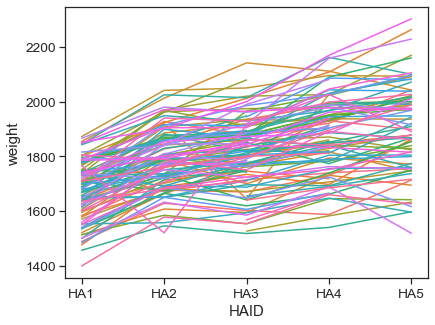

In [30]:
sns.lineplot(x='HAID', y='weight', data=df_HA.sort_values(['HAID']), hue='HenID', legend=False);

In [31]:
#dataframe
#################### add commn mvt var ####################
df_MVT['InitialWeight_kg'] = df_MVT['InitialWeight'].map(lambda x: x/1000)
df_4stat = df_MVT.groupby(['HenID'])[['perc_1_Zone_while_WG_open','vertical_travel_distance_perh',
                                      'perc_duration_5_Zone','InitialWeight_kg','RPen']].agg(lambda x: np.nanmedian(x)).reset_index()
#note: InitialWeight and RPen: have same value all the time, so mean/median is good too
print(df_4stat.shape)
df_4stat.head(3)

#################### add nbr days within first three without mvt ####################
'''m = df_MVT_ALL['DIB'].min()
df_nomvt = df_MVT_ALL[df_MVT_ALL['DIB'].isin([m,m+1,m+2])].groupby('HenID')['Total_number_zone'].agg(lambda x: list(x)).reset_index()
df_nomvt['nbr_first3days_no_mvt'] = df_nomvt['Total_number_zone'].agg(lambda x: sum([i==1 for i in list(x)]))
display(df_nomvt['nbr_first3days_no_mvt'].value_counts(normalize=True))
print(df_nomvt.shape)
df_nomvt.head(3)
print(df_4stat.shape)
df_4stat = pd.merge(df_4stat, df_nomvt[['HenID','nbr_first3days_no_mvt']], on='HenID', how='outer')
print(df_4stat.shape)
'''
#################### add nbr days within first three without mvt ####################
m = df_MVT_ALL['DIB'].min()
df_nomvt = df_MVT_ALL[df_MVT_ALL['DIB'].isin([m,m+1,m+2])].groupby('HenID')['Total_number_zone'].agg(lambda x: list(x)).reset_index()
df_nomvt['nbr_nbrzonevisisted_over_3days'] = df_nomvt['Total_number_zone'].agg(lambda x: sum(x))
display(df_nomvt['nbr_nbrzonevisisted_over_3days'].value_counts(normalize=True))
print(df_nomvt.shape)
df_nomvt.head(3)
print(df_4stat.shape)
df_4stat = pd.merge(df_4stat, df_nomvt[['HenID','nbr_nbrzonevisisted_over_3days']], on='HenID', how='outer')
print(df_4stat.shape)

#################### add BLUP estimates ####################
print(df_4stat.shape)
df_4stat = pd.merge(df_4stat, df_indall[['HenID','BehaviouralType','BLUP_slopes1','BLUP_slopes2','Predictability_mean']], on='HenID', how='inner')
print(df_4stat.shape)

(130, 6)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


12.0    0.269231
9.0     0.161538
10.0    0.115385
8.0     0.115385
11.0    0.100000
6.0     0.092308
7.0     0.076923
3.0     0.038462
5.0     0.030769
Name: nbr_nbrzonevisisted_over_3days, dtype: float64

(130, 3)
(130, 6)
(130, 7)
(130, 7)
(130, 11)


### Dataframe for stats ~ health

In [32]:
################### add HA5 ####################
print(df_4stat.shape)
df_4statmodel = pd.merge(df_4stat, df_HA[df_HA['HAID']=='HA5'][['HenID','PenID','CLASS','Treatment','severity','weight',
                                                           'Feathers']], on='HenID', how='inner')

################### add HA2 feathers ################### to compare its effect with the effect of early mvt
print(df_4stat.shape)
df_earlyHA = df_HA[df_HA['HAID']=='HA2'][['HenID','Feathers']].copy()
df_earlyHA.rename(columns={'Feathers':'FeathersHA2'}, inplace=True)
display(df_earlyHA.head(3))
df_4statmodel = pd.merge(df_4statmodel, df_earlyHA, on='HenID', how='inner')

################### add HA1 ################### to compare its effect with the effect of early mvt
print(df_4stat.shape)
df_earlyHA = df_HA[df_HA['HAID']=='HA1'][['severity','HenID','weight']].copy()
df_earlyHA.rename(columns={'severity':'severityEndEarlyMvt','weight':'weightEndEarlyMvt'}, inplace=True)
display(df_earlyHA.head(3))
df_4statmodel = pd.merge(df_4statmodel, df_earlyHA, on='HenID', how='inner')
#save
df_4statmodel.to_csv(os.path.join(path_extracted_data_adap,'df_MVT_4stat.csv'), index=False, sep=';')
print(df_4statmodel.shape)
df_4statmodel.head(3)

(130, 11)
(130, 11)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,FeathersHA2
4,hen_61,88.333333
9,hen_71,98.666667
14,hen_127,100.000000


(130, 11)


,severityEndEarlyMvt,HenID,weightEndEarlyMvt
3,40,hen_27,1737.5
10,32,hen_146,1647.2
11,0,hen_82,1790.2


(80, 20)


,HenID,perc_1_Zone_while_WG_open,vertical_travel_distance_perh,perc_duration_5_Zone,InitialWeight_kg,RPen,nbr_nbrzonevisisted_over_3days,BehaviouralType,BLUP_slopes1,BLUP_slopes2,Predictability_mean,PenID,CLASS,Treatment,severity,weight,Feathers,FeathersHA2,severityEndEarlyMvt,weightEndEarlyMvt
0,hen_10,0.000000,1.933333,35.0,1.070,1.0,7.0,-0.366230,0.379040,0.189643,1.074071,pen11,LEXP,OFH,40,1713.4,67.000000,93.333333,34,1488.3
1,hen_101,1.372807,4.000000,10.0,1.082,3.0,7.0,0.669667,-0.318522,0.014147,1.311825,pen5,MEXP,OFH,28,1755.3,72.666667,89.000000,0,1625.7
2,hen_102,0.418699,1.000000,86.5,1.158,3.0,6.0,-1.288175,0.076622,0.119137,0.546264,pen3,MEXP,OFH,50,2042.7,61.666667,86.333333,0,1855.1


In [33]:
li_mvtvar = ['nbr_nbrzonevisisted_over_3days','perc_duration_5_Zone','perc_1_Zone_while_WG_open','BLUP_slopes1',
             'BLUP_slopes2','Predictability_mean','BehaviouralType','vertical_travel_distance_perh']
li_df = []
for i in range(0,len(li_mvtvar)-1):
    for j in range(i+1,len(li_mvtvar)):
        v1 = li_mvtvar[i]
        v2 = li_mvtvar[j]
        coeff, pval = pearsonr(df_4statmodel[v1].tolist(), df_4statmodel[v2].tolist())
        li_df.append({'coeff':coeff, 'abscoeff':abs(coeff), 'pval':pval,'var1':v1,'var2':v2})
df_corr = pd.DataFrame(li_df)
print(df_corr.shape)
df_corr = df_corr.sort_values('abscoeff', ascending=False)
df_corr
#--> BehaviouralType is as expected very correlated so we will remove it. However we still have vertical_travel_distance_perh 
#highly correlated with perc_duration_5_Zone. we will remove vertical_travel_distance_perh as no "adapted to our settings" 
#literature and we already have nbr_first3days_no_mvt which capture a little of the idea -->vertical_travel_distance_perh is
#also removed

(28, 5)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,coeff,abscoeff,pval,var1,var2
11,-0.852182,0.852182,1.205103e-23,perc_duration_5_Zone,BehaviouralType
27,0.772143,0.772143,5.051863e-17,BehaviouralType,vertical_travel_distance_perh
12,-0.646962,0.646962,8.954827e-11,perc_duration_5_Zone,vertical_travel_distance_perh
6,0.388709,0.388709,3.663496e-04,nbr_nbrzonevisisted_over_3days,vertical_travel_distance_perh
16,0.383107,0.383107,4.523112e-04,perc_1_Zone_while_WG_open,BehaviouralType
5,0.309537,0.309537,5.206304e-03,nbr_nbrzonevisisted_over_3days,BehaviouralType
2,-0.307486,0.307486,5.528466e-03,nbr_nbrzonevisisted_over_3days,BLUP_slopes1
4,-0.285779,0.285779,1.017903e-02,nbr_nbrzonevisisted_over_3days,Predictability_mean
7,-0.242171,0.242171,3.044316e-02,perc_duration_5_Zone,perc_1_Zone_while_WG_open
0,-0.198926,0.198926,7.689922e-02,nbr_nbrzonevisisted_over_3days,perc_duration_5_Zone


In [34]:
df_4statmodel[df_4statmodel.isna().any(axis=1)]

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,perc_1_Zone_while_WG_open,vertical_travel_distance_perh,perc_duration_5_Zone,InitialWeight_kg,RPen,nbr_nbrzonevisisted_over_3days,BehaviouralType,BLUP_slopes1,BLUP_slopes2,Predictability_mean,PenID,CLASS,Treatment,severity,weight,Feathers,FeathersHA2,severityEndEarlyMvt,weightEndEarlyMvt
53,hen_6,2.263374,4.480769,20.5,1.196,1.0,12.0,0.577077,-0.103742,0.081616,0.759028,pen11,LEXP,OFH,48,1855.0,74.666667,NaN,0,1635.1
65,hen_78,8.889601,3.333333,59.5,1.060,2.0,9.0,-0.565868,0.177804,-0.127854,1.259738,pen10,LEXP,TRAN,30,1626.2,NaN,98.666667,4,1398.9


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


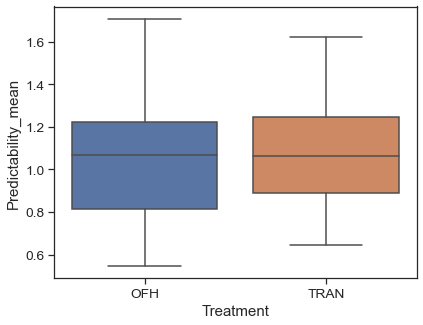

In [35]:
sns.boxplot(y='Predictability_mean', x='Treatment', data=df_4statmodel);

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


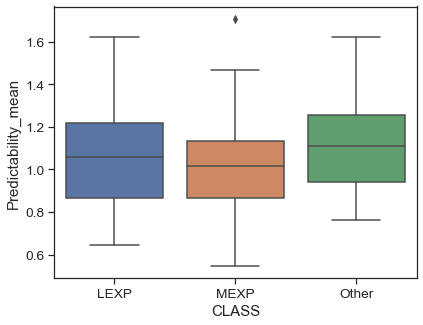

In [36]:
sns.boxplot(y='Predictability_mean', x='CLASS', data=df_4statmodel);

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


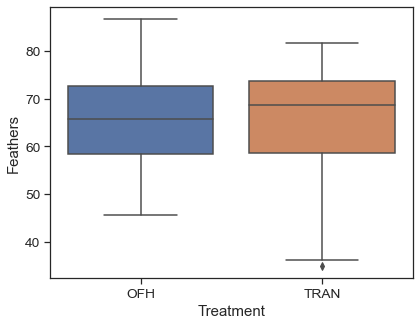

In [37]:
sns.boxplot(y='Feathers', x='Treatment', data=df_4statmodel);

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


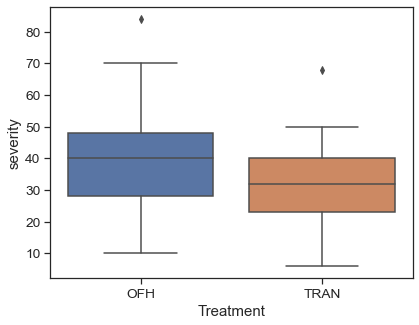

In [38]:
sns.boxplot(y='severity', x='Treatment', data=df_4statmodel);

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


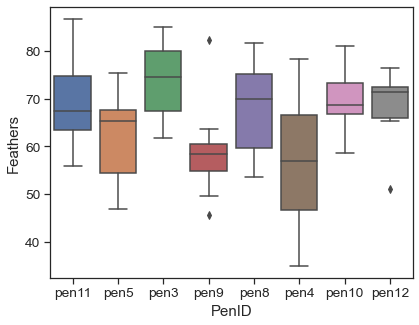

In [39]:
sns.boxplot(y='Feathers', x='PenID', data=df_4statmodel);

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


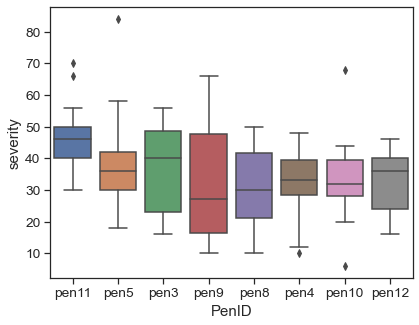

In [40]:
sns.boxplot(y='severity', x='PenID', data=df_4statmodel);

#verify no commun animals
li_hen4FS = df_4featureselec['HenID'].tolist()
li_hen4model = df_4statmodel['HenID'].tolist()
li_commun_hen = [i for i in li_hen4FS if i in li_hen4model]
if len(li_commun_hen)>0:
    print('ERROR: some animals are in both feature selection process and in the model')
    sys.exit()

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


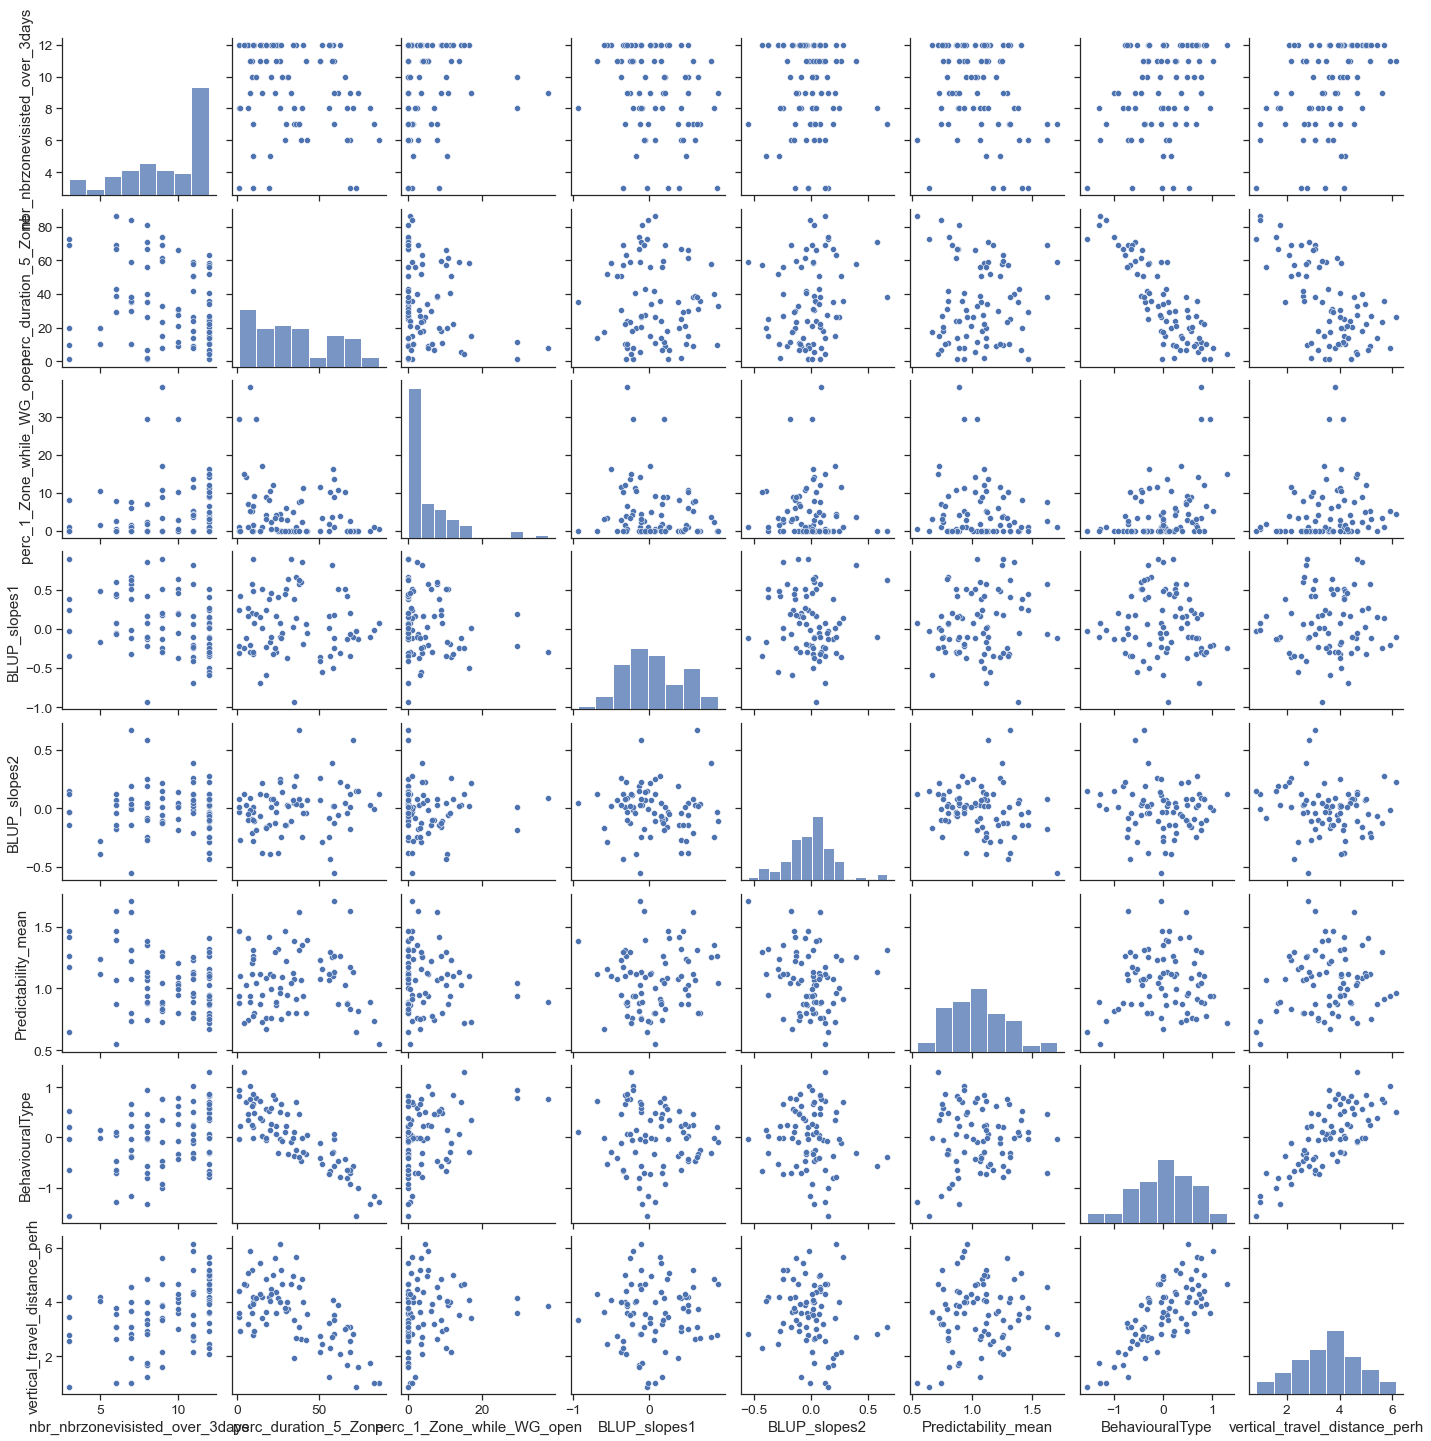

In [41]:
sns.pairplot(df_4statmodel[['nbr_nbrzonevisisted_over_3days','perc_duration_5_Zone','perc_1_Zone_while_WG_open','BLUP_slopes1',
                            'BLUP_slopes2','Predictability_mean','BehaviouralType','vertical_travel_distance_perh']], 
             diag_kind="hist");
plt.savefig(os.path.join(path_extracted_data_adap,'MVTVar.png'), bbox_inches='tight')
plt.show()

In [42]:
print(df_4statmodel.shape)
df_4statmodel.head(3)

(80, 20)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,perc_1_Zone_while_WG_open,vertical_travel_distance_perh,perc_duration_5_Zone,InitialWeight_kg,RPen,nbr_nbrzonevisisted_over_3days,BehaviouralType,BLUP_slopes1,BLUP_slopes2,Predictability_mean,PenID,CLASS,Treatment,severity,weight,Feathers,FeathersHA2,severityEndEarlyMvt,weightEndEarlyMvt
0,hen_10,0.000000,1.933333,35.0,1.070,1.0,7.0,-0.366230,0.379040,0.189643,1.074071,pen11,LEXP,OFH,40,1713.4,67.000000,93.333333,34,1488.3
1,hen_101,1.372807,4.000000,10.0,1.082,3.0,7.0,0.669667,-0.318522,0.014147,1.311825,pen5,MEXP,OFH,28,1755.3,72.666667,89.000000,0,1625.7
2,hen_102,0.418699,1.000000,86.5,1.158,3.0,6.0,-1.288175,0.076622,0.119137,0.546264,pen3,MEXP,OFH,50,2042.7,61.666667,86.333333,0,1855.1


# Visualise raw data

In [43]:
df_rawmvt = pd.read_csv(os.path.join(path_extracted_data, id_run+'_CLEANEDDATA.csv'), sep=';', parse_dates=['Timestamp','date'],
                dayfirst=True) 
print(df_rawmvt.shape)
df_rawmvt.head(3)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2695668, 16)


,HenID,PenID,system,Zone,model_prediction,Timestamp,date,next_record_date,duration,previous_record_date,previous_duration,next_zone,previous_zone,previous_previous_zone,correction_is_consecutive_equal_initial_zone,is_WG_open
0,hen_71,pen12,10 - 12,3_Zone,1.0,2020-09-29 09:07:00,2020-09-29,2020-09-29 09:08:26,0 days 00:01:26,NaN,NaN,3_Zone,NaN,NaN,False,False
1,hen_7,pen11,10 - 12,3_Zone,1.0,2020-09-29 09:08:12,2020-09-29,2020-09-29 09:12:16,0 days 00:04:04,NaN,NaN,3_Zone,NaN,NaN,False,False
2,hen_10,pen11,10 - 12,3_Zone,1.0,2020-09-29 09:19:19,2020-09-29,2020-09-29 09:20:27,0 days 00:01:08,NaN,NaN,3_Zone,NaN,NaN,False,False


In [44]:
#first observation of each week per bird 
df_4plt = df_MVT_ALL.groupby(['WIB','HenID'])[['DIB','level']].agg(lambda x: min(list(x))).reset_index()
print(df_4plt.shape)
display(df_4plt.head(3))
df_4plt = df_4plt.groupby(['HenID'])['level'].agg(lambda x: list(x)).reset_index()
dico_hen_DIB = dict(zip(df_4plt['HenID'].tolist(), df_4plt['level'].tolist()))
dico_hen_DIB

(1040, 4)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,WIB,HenID,DIB,level
0,1,hen_1,1,2020-09-30
1,1,hen_10,1,2020-09-30
2,1,hen_101,1,2020-09-30


{'hen_1': [Timestamp('2020-09-30 00:00:00'),
  Timestamp('2020-10-07 00:00:00'),
  Timestamp('2020-10-15 00:00:00'),
  Timestamp('2020-10-21 00:00:00'),
  Timestamp('2020-10-28 00:00:00'),
  Timestamp('2020-11-04 00:00:00'),
  Timestamp('2020-11-11 00:00:00'),
  Timestamp('2020-11-18 00:00:00')],
 'hen_10': [Timestamp('2020-09-30 00:00:00'),
  Timestamp('2020-10-07 00:00:00'),
  Timestamp('2020-10-15 00:00:00'),
  Timestamp('2020-10-21 00:00:00'),
  Timestamp('2020-10-28 00:00:00'),
  Timestamp('2020-11-04 00:00:00'),
  Timestamp('2020-11-11 00:00:00'),
  Timestamp('2020-11-18 00:00:00')],
 'hen_101': [Timestamp('2020-09-30 00:00:00'),
  Timestamp('2020-10-07 00:00:00'),
  Timestamp('2020-10-15 00:00:00'),
  Timestamp('2020-10-21 00:00:00'),
  Timestamp('2020-10-28 00:00:00'),
  Timestamp('2020-11-10 00:00:00'),
  Timestamp('2020-11-11 00:00:00'),
  Timestamp('2020-11-18 00:00:00')],
 'hen_102': [Timestamp('2020-09-30 00:00:00'),
  Timestamp('2020-10-07 00:00:00'),
  Timestamp('2020-10

In [45]:
df_MVT_ALL.groupby(['WIB'])['DIB'].agg(lambda x: set(x)).reset_index() #--> remove week 8?

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,WIB,DIB
0,1,"{1, 2, 3, 4, 5, 6, 7}"
1,2,"{8, 11, 12, 13, 14}"
2,3,"{16, 17, 18, 19, 20, 21}"
3,4,"{22, 23, 24, 25, 26, 27, 28}"
4,5,"{32, 33, 34, 35, 29, 30, 31}"
5,6,"{36, 37, 38, 39, 40, 41, 42}"
6,7,"{43, 44, 45, 46, 47, 48, 49}"
7,8,"{50, 51, 52, 53, 54}"


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:49<00:00, 13.65s/it]


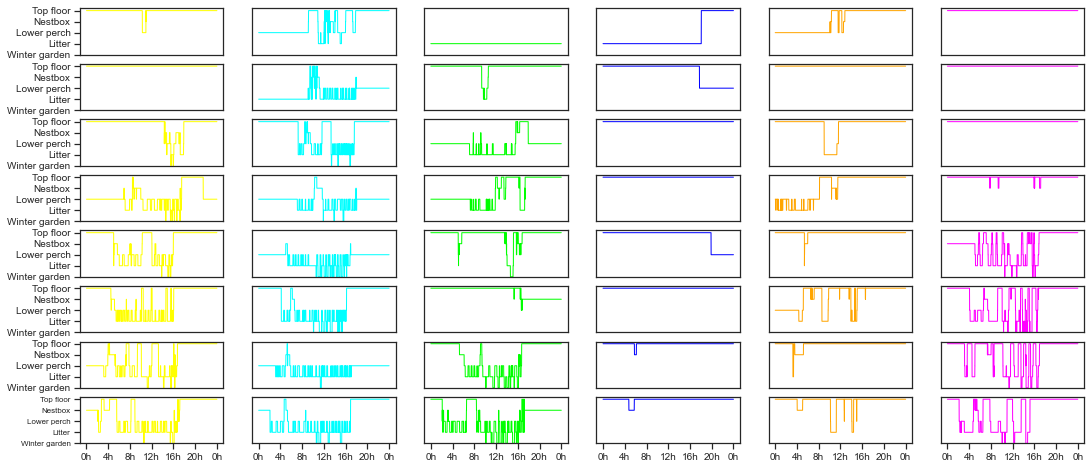

In [49]:
c = len(li_hen_visual)
li_date = df_MVT_ALL['WIB'].unique()
l = len(li_date)
img_w = 3 #shape[1]
img_h = 1 #shape[0]
dico_zone_order = {'1_Zone':0, '2_Zone':1, '3_Zone':2, '4_Zone':3, '5_Zone':4} #to sort the yaxis
i = 0
fig = plt.figure(figsize=(int(c*img_w), int(l*img_h)))
for x in tqdm.tqdm(range(len(li_date))):
    for henID in li_hen_visual:
        d = dico_hen_DIB[henID][x]
        plt.subplot(l,c,i+1)
        i = i+1
        #keep the previous day to have a full time serie (not missing info before any transitions occured that day)
        #-8 for hens that did not moved during several consecutive days
        df_plt = df_rawmvt[((d-dt.timedelta(hours=24*8))<=df_rawmvt['date'])&(df_rawmvt['date']<=d)\
                           &(df_rawmvt['HenID']==henID)].copy()
        df_plt = df_plt.sort_values(['Timestamp']).copy()
        Daterange = pd.date_range(start=d-dt.timedelta(hours=10), end=d+dt.timedelta(hours=24), freq='S') 
        df_plt.set_index('Timestamp', inplace=True)
        df_plt_ = df_plt.reindex(Daterange, method='ffill').reset_index()
        df_plt_.rename(columns={'index':'Timestamp'}, inplace=True)
        #add date again, as the reindexing also extended the date
        df_plt_['date'] = df_plt_['Timestamp'].map(lambda x: dt.datetime.date(x))
        #keep only the date of interest
        df_plt_ = df_plt_[df_plt_['date']==dt.datetime.date(d)]
        #put xlabel into numbers for the ploting
        df_plt_['Zone'] = df_plt_['Zone'].map(lambda x: int(dico_zone_order[x]))    
        plt.plot(df_plt_['Timestamp'].tolist(), df_plt_['Zone'].tolist(), linewidth=1, color=pal_[henID])
        #add title on the top figure only
        #if i<=c:
        #    plt.title(henID, size=10) #as small verification
        #plt.title(henID+' '+str(d).split('T')[0], size=7) #as small verification
        #remove x and y axis annotations
        plt.xticks([])
        plt.yticks([])
        #except: y-axis info on the right figures only
        if i%c==1:
            plt.yticks([0,1,2,3,4], ['Winter garden', 'Litter', 'Lower perch','Nestbox','Top floor'])
            plt.yticks(fontsize=10)
        #except: x-axis info on the bottom figures only
        if i>(l*c-c):
            li_hour = pd.date_range(start = d,  end = d+dt.timedelta(days=1), freq = '4H') #xlabel: every 4h for readibility
            plt.xticks(li_hour, [str(i.hour)+'h' for i in li_hour], fontsize=10)      
            plt.yticks(fontsize=8)
        plt.ylim(0, 4.2)     
plt.savefig(os.path.join(path_extracted_data_adap, 'Rawdata.png'), bbox_inches='tight', dpi=300)

(48, 10)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,DIB,selecte4_visual,level,WIB,perc_duration_5_Zone,perc_duration_4_Zone,perc_duration_3_Zone,perc_duration_2_Zone,perc_1_Zone_while_WG_open
8801,hen_39,1,True,2020-09-30,1,0.0,0.0,0.0,100.0,NaN
8807,hen_39,8,True,2020-10-07,2,97.0,0.0,3.0,0.0,NaN
8811,hen_39,16,True,2020-10-15,3,100.0,0.0,0.0,0.0,0.0


,WIB,HenID,variable,value
0,1,hen_39,perc_duration_5_Zone,0.0
1,2,hen_39,perc_duration_5_Zone,97.0
2,3,hen_39,perc_duration_5_Zone,100.0


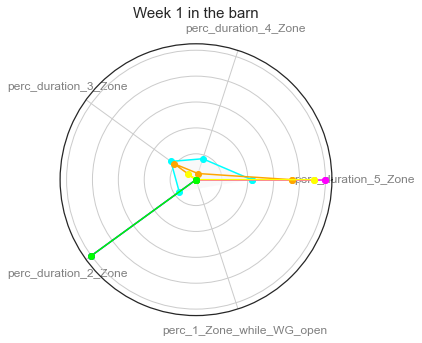

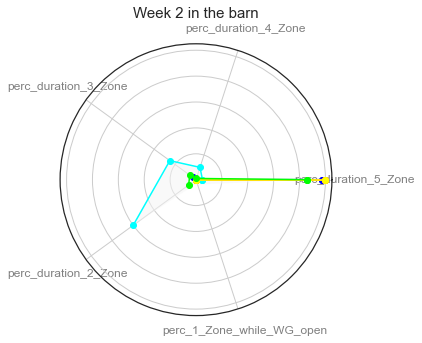

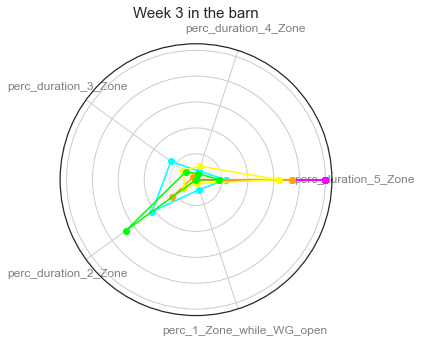

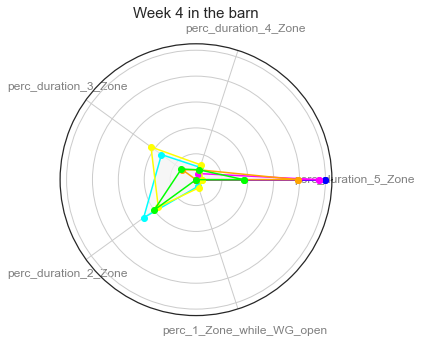

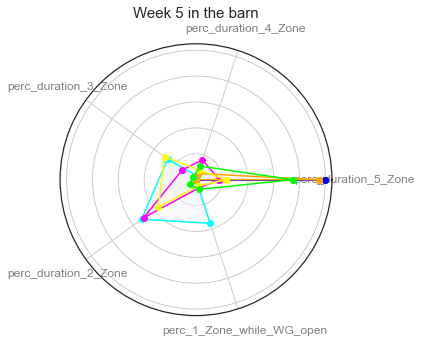

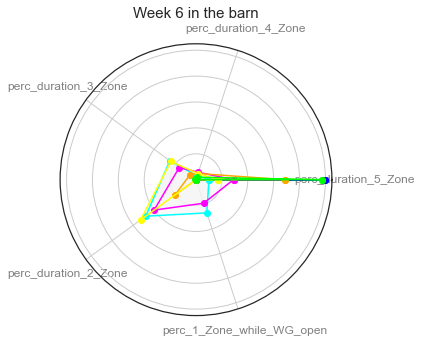

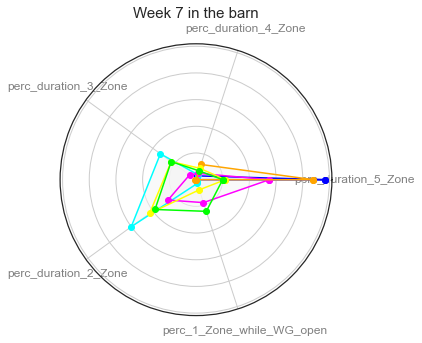

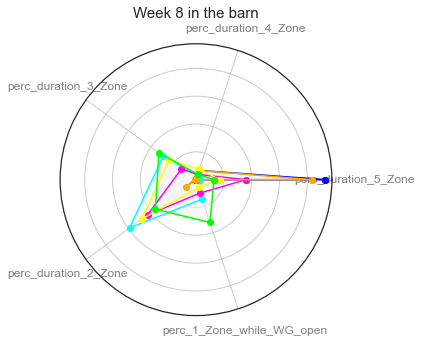

In [93]:
li_varradar = ['perc_duration_5_Zone','perc_duration_4_Zone','perc_duration_3_Zone','perc_duration_2_Zone',
               'perc_1_Zone_while_WG_open']
df_MVT_ALL['selecte4_visual'] = df_MVT_ALL.apply(lambda x: x['level'] in dico_hen_DIB.get(x['HenID'],[]), axis=1)
df_plt = df_MVT_ALL[(df_MVT_ALL['selecte4_visual'])&(df_MVT_ALL['HenID'].isin(li_hen_visual))][['HenID','DIB','selecte4_visual',
                                                                                                'level','WIB']+li_varradar]
print(df_plt.shape)
display(df_plt.head(3))
df_plt = pd.melt(df_plt, id_vars=['WIB','HenID'], value_vars=li_varradar).reset_index(drop=True)
display(df_plt.head(3))

for WIB in df_plt['WIB'].unique():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="polar")
    for henID in df_plt['HenID'].unique():
        df_ = df_plt[(df_plt['HenID']==henID)&(df_plt['WIB']==WIB)].copy()
        #theta = nbr_var + 1 as first one gets repeated
        nbr_var = len(df_)
        theta = np.arange(nbr_var + 1) / float(nbr_var) * 2 * np.pi
        values = df_['value'].values
        values = np.append(values, values[0])
        #draw the polygon and the mark the points for each angle/value combination
        l1, = ax.plot(theta, values, marker="o", color=pal_[henID])
        plt.xticks(theta[:-1], df_['variable'], color='grey', size=12)
        ax.tick_params(pad=10) # to increase the distance of the labels to the plot
        #fill polygon
        ax.fill(theta, values, 'whitesmoke', alpha=0.5)
        #remove useless writting
        plt.yticks(color='white') 
    plt.title('Week '+str(WIB)+" in the barn")
    plt.savefig(os.path.join(path_extracted_data_adap,"DailyVarDuration"+str(WIB)+".png"), bbox_inches='tight')
    plt.show()

(48, 10)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,DIB,selecte4_visual,level,WIB,nbr_stays_2_Zone_perh,nbr_stays_4_Zone_perh,nbr_stays_3_Zone_perh,nbr_stays_5_Zone_perh,nbr_stays_1_Zone_perh
8801,hen_39,1,True,2020-09-30,1,0.125,0.0,0.000000,0.000000,NaN
8807,hen_39,8,True,2020-10-07,2,0.000,0.0,0.111111,0.111111,NaN
8811,hen_39,16,True,2020-10-15,3,0.000,0.0,0.000000,0.100000,0.0


,WIB,HenID,variable,value
0,1,hen_39,nbr_stays_2_Zone_perh,0.125
1,2,hen_39,nbr_stays_2_Zone_perh,0.000
2,3,hen_39,nbr_stays_2_Zone_perh,0.000


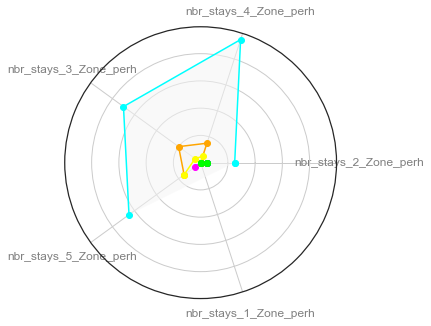

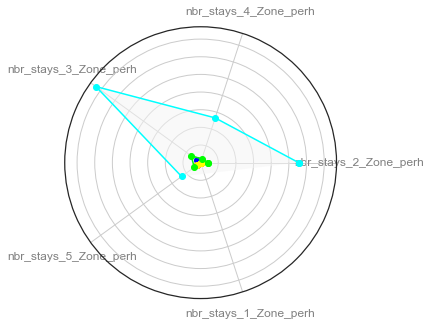

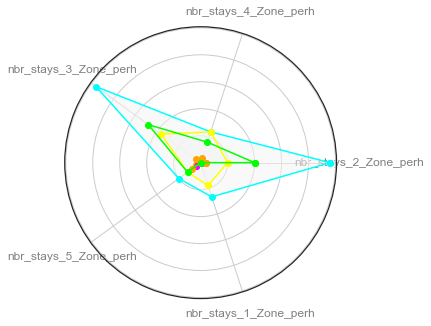

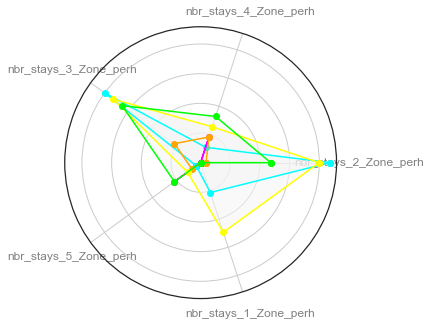

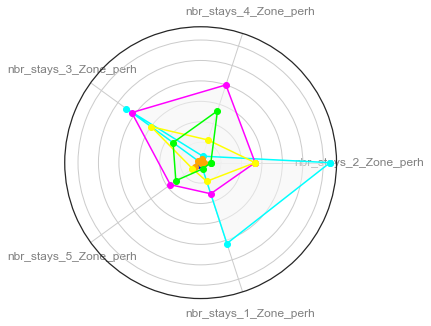

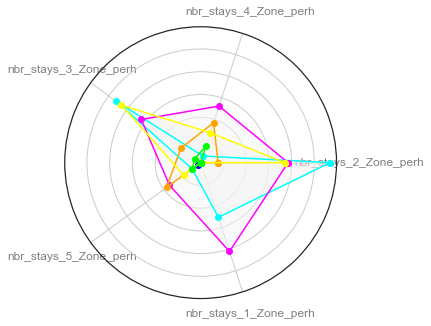

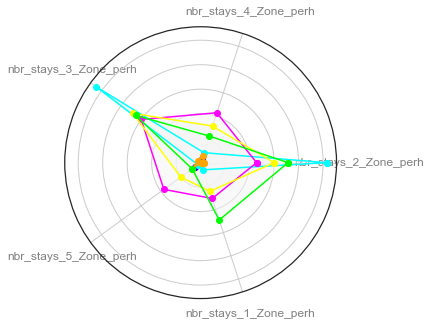

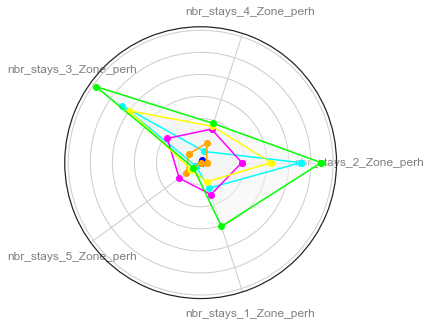

In [95]:
li_varradar = ['nbr_stays_2_Zone_perh', 'nbr_stays_4_Zone_perh','nbr_stays_3_Zone_perh', 'nbr_stays_5_Zone_perh','nbr_stays_1_Zone_perh']
df_MVT_ALL['selecte4_visual'] = df_MVT_ALL.apply(lambda x: x['level'] in dico_hen_DIB.get(x['HenID'],[]), axis=1)
df_plt = df_MVT_ALL[(df_MVT_ALL['selecte4_visual'])&(df_MVT_ALL['HenID'].isin(li_hen_visual))][['HenID','DIB','selecte4_visual',
                                                                                                'level','WIB']+li_varradar]
print(df_plt.shape)
display(df_plt.head(3))
df_plt = pd.melt(df_plt, id_vars=['WIB','HenID'], value_vars=li_varradar).reset_index(drop=True)
display(df_plt.head(3))

for WIB in df_plt['WIB'].unique():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="polar")
    for henID in df_plt['HenID'].unique():
        df_ = df_plt[(df_plt['HenID']==henID)&(df_plt['WIB']==WIB)].copy()
        #theta = nbr_var + 1 as first one gets repeated
        nbr_var = len(df_)
        theta = np.arange(nbr_var + 1) / float(nbr_var) * 2 * np.pi
        values = df_['value'].values
        values = np.append(values, values[0])
        #draw the polygon and the mark the points for each angle/value combination
        l1, = ax.plot(theta, values, marker="o", color=pal_[henID])
        plt.xticks(theta[:-1], df_['variable'], color='grey', size=12)
        ax.tick_params(pad=10) # to increase the distance of the labels to the plot
        #fill polygon
        ax.fill(theta, values, 'whitesmoke', alpha=0.5)
        #remove useless writting
        plt.yticks(color='white') 
    #plt.title('Week '+str(WIB)+" in the barn")
    plt.savefig(os.path.join(path_extracted_data_adap,"DailyVarnbrstay"+str(WIB)+".png"), bbox_inches='tight')
plt.show()

In [ ]:
['in_WG_15mnAfterOpening', 'SleepingHeight','vertical_travel_distance_perh']

In [50]:
#clustering after first two months
li_VARCL = ['nbr_nbrzonevisisted_over_3days','perc_duration_5_Zone','perc_1_Zone_while_WG_open','BLUP_slopes1',
             'BLUP_slopes2','Predictability_mean']
li_2keep = ['HenID']
df_ = df_4stat[li_VARCL+li_2keep].dropna(how='any').copy()

#scaling data
df_kmeans = df_.copy()
sc = preprocessing.StandardScaler() #standardization: ean of 0 and standard deviation of 1
df_kmeans[li_VARCL] = sc.fit_transform(df_kmeans[li_VARCL])
display(df_kmeans[li_VARCL].head(3))

print(df_4stat.shape, df_kmeans.shape)
li_ = range(2,10)
r, center_ = kmeans_clustering(df=df_kmeans, range_n_clusters=li_, drop_col_list=li_2keep)
if len(r)!=df_kmeans.shape[0]:
    print('ERROR')
    sys.exit()
df_['clusterID'] = r
display(df_[li_2keep+li_VARCL+['clusterID']].head(3))
print(df_4stat.shape)
df_4stat_ = pd.merge(df_kmeans, df_[li_2keep+['clusterID']], on=['HenID'], how='left')
print(df_4stat_.shape)
df_4stat_.head(3)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nbr_nbrzonevisisted_over_3days,perc_duration_5_Zone,perc_1_Zone_while_WG_open,BLUP_slopes1,BLUP_slopes2,Predictability_mean
0,-0.090923,1.748918,0.774161,1.610116,1.529920,-0.528923
1,-0.906099,-0.007383,-0.747239,1.039060,0.947898,0.114400
2,-0.906099,-1.028489,-0.546734,-0.875313,0.071704,0.994588


(130, 11) (130, 7)
For n_clusters = 2 The average silhouette_score is : 0.20633403532639108
For n_clusters = 3 The average silhouette_score is : 0.2167063496701493
For n_clusters = 4 The average silhouette_score is : 0.19901133940210372
For n_clusters = 5 The average silhouette_score is : 0.1992687360443858
For n_clusters = 6 The average silhouette_score is : 0.16775527826705908
For n_clusters = 7 The average silhouette_score is : 0.19216301417764012
For n_clusters = 8 The average silhouette_score is : 0.18217494697951805
For n_clusters = 9 The average silhouette_score is : 0.1825100592663362
Please let me know the numbers of clusters you want to search for 3
(130, 6)


,HenID,nbr_nbrzonevisisted_over_3days,perc_duration_5_Zone,perc_1_Zone_while_WG_open,BLUP_slopes1,BLUP_slopes2,Predictability_mean,clusterID
0,hen_1,9.0,78.0,10.416667,0.587122,0.306218,0.900299,1
1,hen_10,7.0,35.0,0.000000,0.379040,0.189643,1.074071,1
2,hen_101,7.0,10.0,1.372807,-0.318522,0.014147,1.311825,2


(130, 11)
(130, 8)


,nbr_nbrzonevisisted_over_3days,perc_duration_5_Zone,perc_1_Zone_while_WG_open,BLUP_slopes1,BLUP_slopes2,Predictability_mean,HenID,clusterID
0,-0.090923,1.748918,0.774161,1.610116,1.529920,-0.528923,hen_1,1
1,-0.906099,-0.007383,-0.747239,1.039060,0.947898,0.114400,hen_10,1
2,-0.906099,-1.028489,-0.546734,-0.875313,0.071704,0.994588,hen_101,2


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


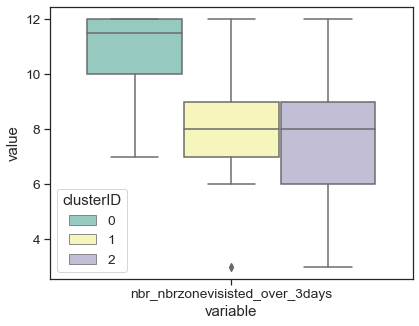

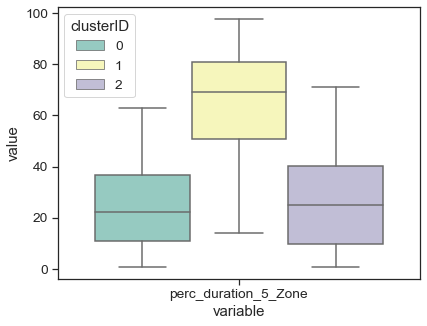

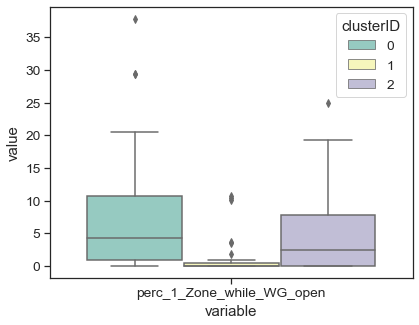

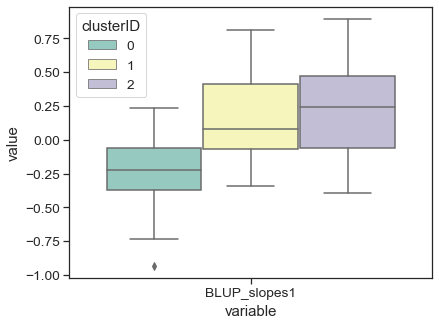

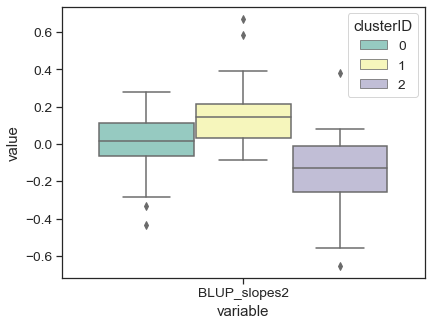

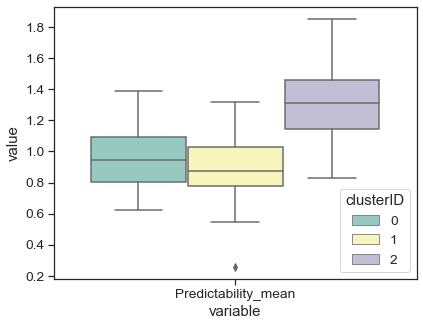

In [51]:
#### plot boxplot for each x variable in each cluster (given by the 'cluster_name' column from df)
for x in li_VARCL:
    df_plt = pd.melt(df_, id_vars=['clusterID','HenID'], value_vars=x).reset_index(drop=True)
    ax = sns.boxplot(x="variable", y="value", hue='clusterID',data=df_plt, palette="Set3")
    #plt.savefig(os.path.join(path_cluster, 'clusterID'+x+'.png'), bbox_inches='tight')
    plt.show();

In [67]:
dico_id_name = {0:'early mover', 1:'top tier bird', 2:'low predictable'}
df_4stat_['clusterID name'] = df_4stat_['clusterID'].map(lambda x: dico_id_name[x])
print(df_4stat_.shape)
df_4stat_.head(3)

(130, 9)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nbr_nbrzonevisisted_over_3days,perc_duration_5_Zone,perc_1_Zone_while_WG_open,BLUP_slopes1,BLUP_slopes2,Predictability_mean,HenID,clusterID,clusterID name
0,-0.090923,1.748918,0.774161,1.610116,1.529920,-0.528923,hen_1,1,top tier bird
1,-0.906099,-0.007383,-0.747239,1.039060,0.947898,0.114400,hen_10,1,top tier bird
2,-0.906099,-1.028489,-0.546734,-0.875313,0.071704,0.994588,hen_101,2,low predictable


In [68]:
df_plt = df_4stat_.groupby(['clusterID name'])[li_VARCL].mean().reset_index()
display(df_plt)
df_plt = pd.melt(df_plt, id_vars=['clusterID name'], value_vars=li_VARCL)
display(df_plt)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,clusterID name,nbr_nbrzonevisisted_over_3days,perc_duration_5_Zone,perc_1_Zone_while_WG_open,BLUP_slopes1,BLUP_slopes2,Predictability_mean
0,early mover,0.691382,-0.379263,0.258648,-0.614021,0.061562,-0.339741
1,low predictable,-0.676177,-0.281249,-0.012036,0.595634,-0.701397,0.991374
2,top tier bird,-0.568785,1.189070,-0.536787,0.511711,0.811643,-0.606885


,clusterID name,variable,value
0,early mover,nbr_nbrzonevisisted_over_3days,0.691382
1,low predictable,nbr_nbrzonevisisted_over_3days,-0.676177
2,top tier bird,nbr_nbrzonevisisted_over_3days,-0.568785
3,early mover,perc_duration_5_Zone,-0.379263
4,low predictable,perc_duration_5_Zone,-0.281249
5,top tier bird,perc_duration_5_Zone,1.189070
6,early mover,perc_1_Zone_while_WG_open,0.258648
7,low predictable,perc_1_Zone_while_WG_open,-0.012036
8,top tier bird,perc_1_Zone_while_WG_open,-0.536787
9,early mover,BLUP_slopes1,-0.614021


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


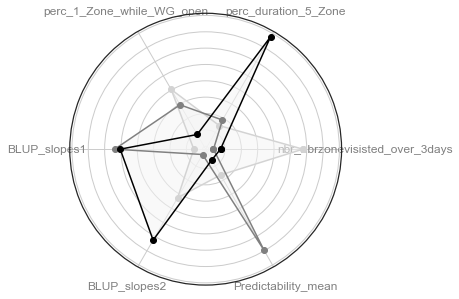

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")
#li_color = ['lightgrey','black','gray'] #dimgrey
dico_clID_color = {'early mover':'lightgrey',
                   'top tier bird':'black',
                   'low predictable':'gray'}
for clusterID in df_plt['clusterID name'].unique():
    df_ = df_plt[df_plt['clusterID name']==clusterID]
    #theta = nbr_var + 1 as first one gets repeated
    nbr_var = len(df_)
    theta = np.arange(nbr_var + 1) / float(nbr_var) * 2 * np.pi
    values = df_['value'].values
    values = np.append(values, values[0])
    #draw the polygon and the mark the points for each angle/value combination
    l1, = ax.plot(theta, values, marker="o", color=dico_clID_color[clusterID])
    plt.xticks(theta[:-1], df_['variable'], color='grey', size=12)
    ax.tick_params(pad=10) # to increase the distance of the labels to the plot
    #fill polygon
    ax.fill(theta, values, 'whitesmoke', alpha=0.5)
    #remove useless writting
    plt.yticks(color='white') 
plt.savefig(os.path.join(path_extracted_data_adap,'Categories.png'), bbox_inches='tight')
plt.show()

In [ ]:
dico_clID_color = {'early mover':'lightgrey', 'top tier bird':'black', 'low predictable':'gray'}

(80, 20)
(80, 21)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,perc_1_Zone_while_WG_open,vertical_travel_distance_perh,perc_duration_5_Zone,InitialWeight_kg,RPen,nbr_nbrzonevisisted_over_3days,BehaviouralType,BLUP_slopes1,BLUP_slopes2,...,PenID,CLASS,Treatment,severity,weight,Feathers,FeathersHA2,severityEndEarlyMvt,weightEndEarlyMvt,clusterID name
0,hen_10,0.000000,1.933333,35.0,1.070,1.0,7.0,-0.366230,0.379040,0.189643,...,pen11,LEXP,OFH,40,1713.4,67.000000,93.333333,34,1488.3,top tier bird
1,hen_101,1.372807,4.000000,10.0,1.082,3.0,7.0,0.669667,-0.318522,0.014147,...,pen5,MEXP,OFH,28,1755.3,72.666667,89.000000,0,1625.7,low predictable
2,hen_102,0.418699,1.000000,86.5,1.158,3.0,6.0,-1.288175,0.076622,0.119137,...,pen3,MEXP,OFH,50,2042.7,61.666667,86.333333,0,1855.1,top tier bird


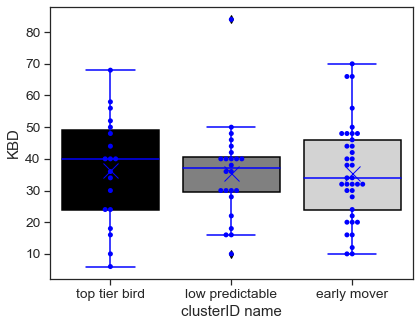

In [96]:
print(df_4statmodel.shape)
df_4statmodel_ = pd.merge(df_4statmodel, df_4stat_[['clusterID name','HenID']], on=['HenID'], how='left')
print(df_4statmodel_.shape)
display(df_4statmodel_.head(3))
ax = sns.boxplot(x="clusterID name", y="severity", data=df_4statmodel_, palette=dico_clID_color,
                 showmeans=True, meanprops={"marker":"x", "markerfacecolor":"blue", "markeredgecolor":"blue","markersize":"15"})
for line in ax.get_lines():
    line.set_color('blue')
sns.swarmplot(x="clusterID name", y="severity", data=df_4statmodel_, color='blue')
plt.ylabel('KBD')
plt.savefig(os.path.join(path_extracted_data_adap,'Categories_KBD.png'), bbox_inches='tight');

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


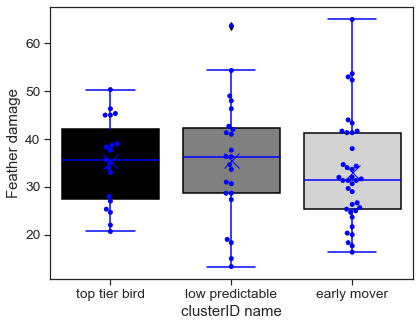

In [97]:
df_4statmodel_['Feathers damage'] = df_4statmodel_['Feathers'].map(lambda x: 100-x)
ax = sns.boxplot(x="clusterID name", y="Feathers damage", data=df_4statmodel_, palette=dico_clID_color,
                 showmeans=True, meanprops={"marker":"x", "markerfacecolor":"blue", "markeredgecolor":"blue","markersize":"15"})
for line in ax.get_lines():
    line.set_color('blue')
sns.swarmplot(x="clusterID name", y="Feathers damage", data=df_4statmodel_, color='blue')
plt.ylabel('Feather damage')
plt.savefig(os.path.join(path_extracted_data_adap,'Categories_FD.png'), bbox_inches='tight');

In [58]:
df_4statmodel_.groupby(['clusterID'])['HenID'].count().reset_index()

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,clusterID,HenID
0,0,37
1,1,19
2,2,24
